In [1]:
#Import library and packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

# Data Understanding and Cleaning

In [2]:
#Load data and check its basic information
df = pd.read_csv('PG covid19.csv')
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   505 non-null    int64  
 1   date     505 non-null    object 
 2   TICKER   505 non-null    object 
 3   COMNAM   505 non-null    object 
 4   BIDLO    505 non-null    float64
 5   ASKHI    505 non-null    float64
 6   PRC      505 non-null    float64
 7   VOL      505 non-null    int64  
 8   RET      505 non-null    float64
 9   BID      505 non-null    float64
 10  ASK      505 non-null    float64
 11  OPENPRC  505 non-null    float64
 12  vwretd   505 non-null    float64
 13  vwretx   505 non-null    float64
 14  ewretd   505 non-null    float64
 15  ewretx   505 non-null    float64
 16  sprtrn   505 non-null    float64
dtypes: float64(12), int64(2), object(3)
memory usage: 67.2+ KB


None

PERMNO        date TICKER               COMNAM  BIDLO  ASKHI    PRC  \
0   18163  2019-01-02     PG  PROCTER & GAMBLE CO  89.93  91.39  91.28   
1   18163  2019-01-03     PG  PROCTER & GAMBLE CO  90.38  92.50  90.64   
2   18163  2019-01-04     PG  PROCTER & GAMBLE CO  90.37  92.49  92.49   
3   18163  2019-01-07     PG  PROCTER & GAMBLE CO  91.40  92.50  92.12   
4   18163  2019-01-08     PG  PROCTER & GAMBLE CO  91.82  93.09  92.46   

        VOL       RET    BID    ASK  OPENPRC    vwretd    vwretx    ewretd  \
0   9843939 -0.006963  91.23  91.24    91.03  0.001796  0.001791  0.017126   
1   9820374 -0.007011  90.62  90.63    90.94 -0.021043 -0.021229 -0.009454   
2  10565749  0.020410  92.45  92.47    90.84  0.033410  0.033409  0.030804   
3   9012540 -0.004000  92.13  92.14    91.91  0.009202  0.009196  0.016144   
4   9551291  0.003691  92.46  92.47    92.70  0.010269  0.010248  0.010358   

     ewretx    sprtrn  
0  0.017105  0.001269  
1 -0.009493 -0.024757  
2  0.030780  0.034336  
3  0.016133  0.007010  
4  0.010339  0.009695

In [3]:
df['PERMNO'] = df['PERMNO'].apply(str)

In [4]:
df.isnull().sum()

PERMNO     0
date       0
TICKER     0
COMNAM     0
BIDLO      0
ASKHI      0
PRC        0
VOL        0
RET        0
BID        0
ASK        0
OPENPRC    0
vwretd     0
vwretx     0
ewretd     0
ewretx     0
sprtrn     0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.sort_values('date')
df

PERMNO TICKER               COMNAM      BIDLO      ASKHI  \
date                                                                  
2019-01-02  18163     PG  PROCTER & GAMBLE CO   89.93000   91.39000   
2019-01-03  18163     PG  PROCTER & GAMBLE CO   90.38000   92.50000   
2019-01-04  18163     PG  PROCTER & GAMBLE CO   90.37000   92.49000   
2019-01-07  18163     PG  PROCTER & GAMBLE CO   91.40000   92.50000   
2019-01-08  18163     PG  PROCTER & GAMBLE CO   91.82000   93.09000   
...           ...    ...                  ...        ...        ...   
2020-12-24  18163     PG  PROCTER & GAMBLE CO  136.20000  138.13000   
2020-12-28  18163     PG  PROCTER & GAMBLE CO  137.94501  139.39349   
2020-12-29  18163     PG  PROCTER & GAMBLE CO  138.20000  139.94000   
2020-12-30  18163     PG  PROCTER & GAMBLE CO  137.55000  138.92140   
2020-12-31  18163     PG  PROCTER & GAMBLE CO  137.39000  139.28999   

                  PRC       VOL       RET        BID        ASK    OPENPRC  \
date                                                                         
2019-01-02   91.28000   9843939 -0.006963   91.23000   91.24000   91.03000   
2019-01-03   90.64000   9820374 -0.007011   90.62000   90.63000   90.94000   
2019-01-04   92.49000  10565749  0.020410   92.45000   92.47000   90.84000   
2019-01-07   92.12000   9012540 -0.004000   92.13000   92.14000   91.91000   
2019-01-08   92.46000   9551291  0.003691   92.46000   92.47000   92.70000   
...               ...       ...       ...        ...        ...        ...   
2020-12-24  137.72000   2588169  0.010122  137.75999  137.84000  136.20000   
2020-12-28  138.67999   3714683  0.006971  138.67999  138.73000  138.14999   
2020-12-29  138.42000   5139415 -0.001875  138.48000  138.49001  139.22000   
2020-12-30  137.77000   3261417 -0.004696  137.78999  137.80000  138.60001   
2020-12-31  139.14000   4076415  0.009944  138.99001  139.00000  138.31000   

              vwretd    vwretx    ewretd    ewretx    sprtrn  
date                                                          
2019-01-02  0.001796  0.001791  0.017126  0.017105  0.001269  
2019-01-03 -0.021043 -0.021229 -0.009454 -0.009493 -0.024757  
2019-01-04  0.033410  0.033409  0.030804  0.030780  0.034336  
2019-01-07  0.009202  0.009196  0.016144  0.016133  0.007010  
2019-01-08  0.010269  0.010248  0.010358  0.010339  0.009695  
...              ...       ...       ...       ...       ...  
2020-12-24  0.002330  0.002195 -0.000277 -0.000458  0.003537  
2020-12-28  0.003847  0.003836  0.001350  0.001304  0.008723  
2020-12-29 -0.003652 -0.003660 -0.008483 -0.008656 -0.002227  
2020-12-30  0.003291  0.003124  0.010155  0.009754  0.001342  
2020-12-31  0.003558  0.003499 -0.001058 -0.001129  0.006439  

[505 rows x 16 columns]

# EDA

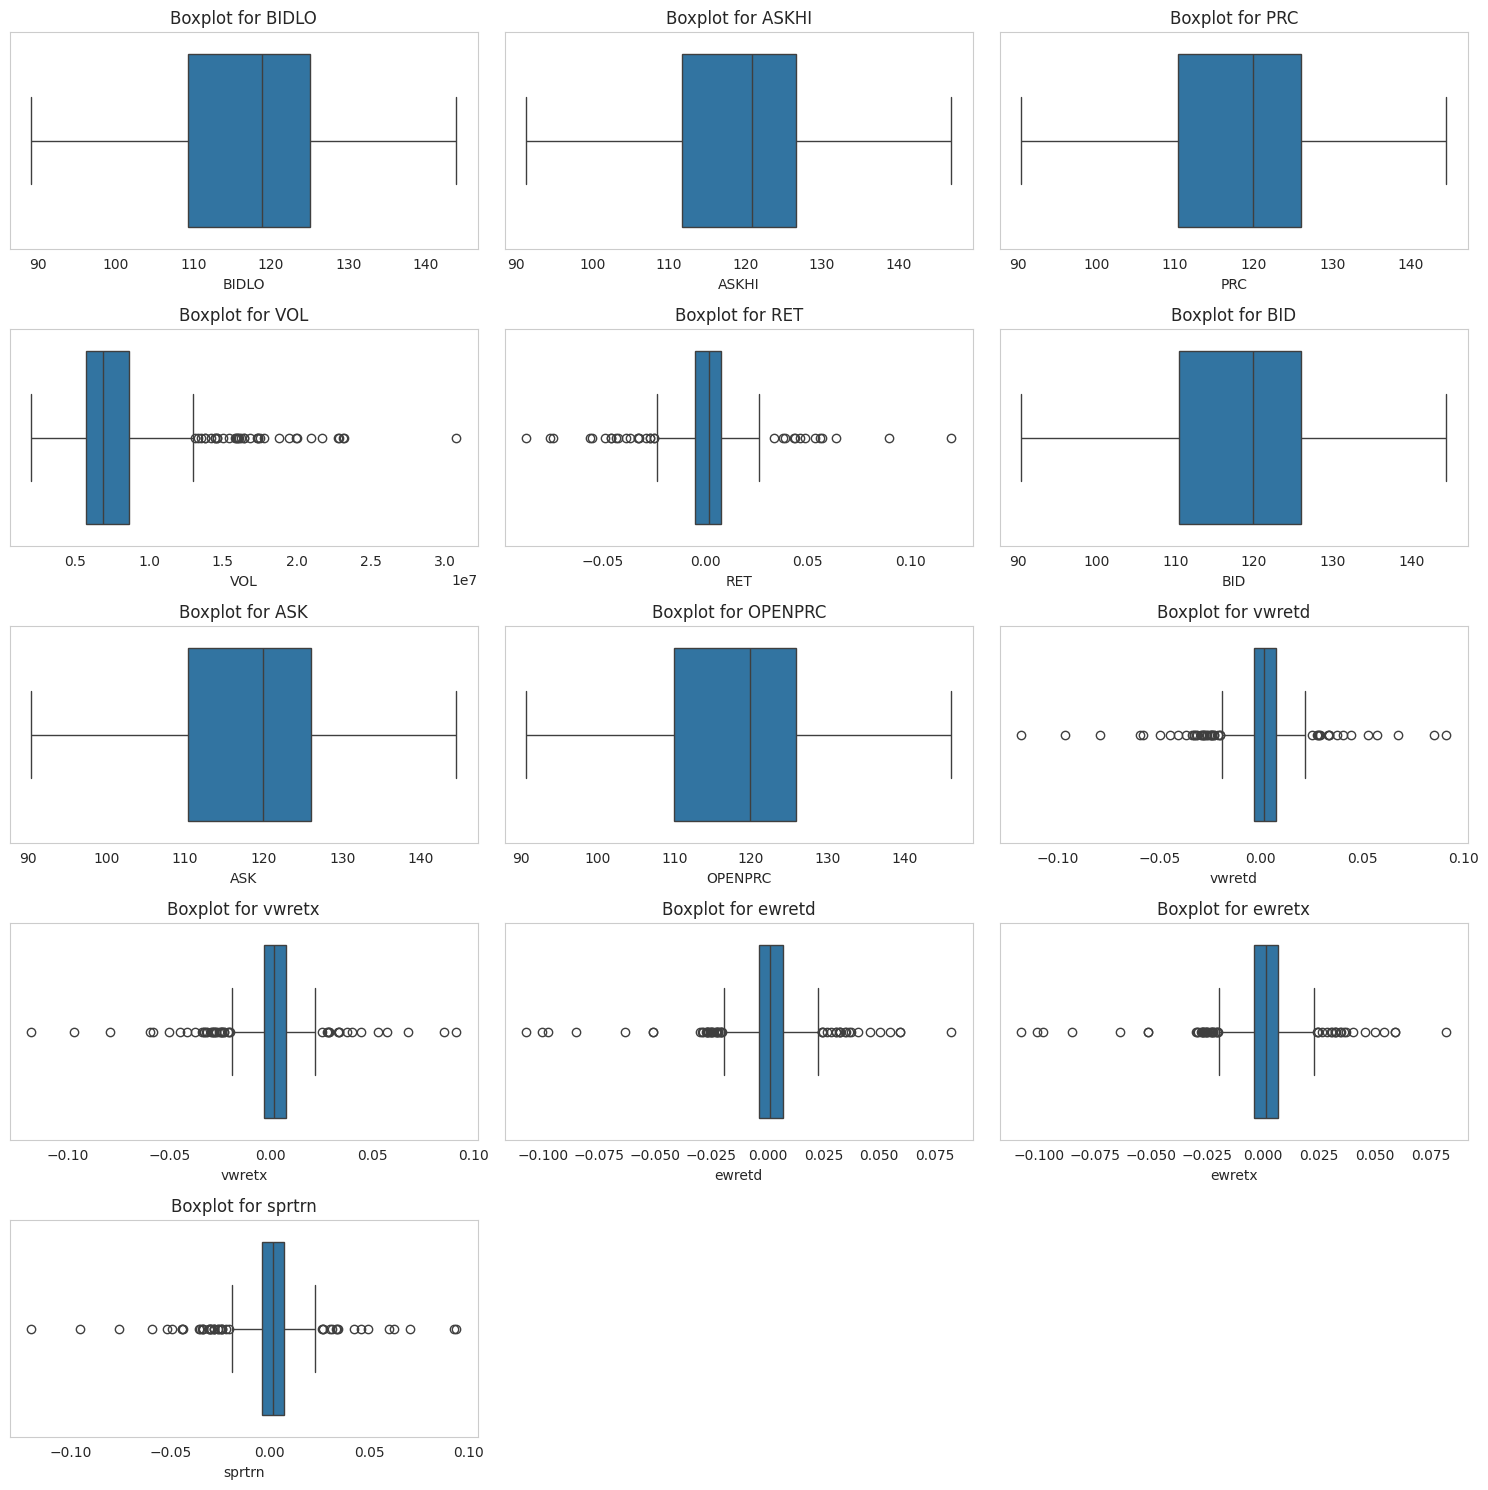

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 15))

# Iterate through each numerical variable and plot a boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 rows, 4 columns
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

For the features such as trading volume (VOL), return (RET), value-weighted returns (vwretd, vwretx), equal-weighted returns (ewretd), and S&P Composite Index return (sprtrn), there are ouliters that we need to pay attention to.If we check their validity further, we can figure out that,

*   VOL represents the trading volume. The outliers might indicate days of unusually high trading activity.
*   RET represents the return. Outliers might indicate extreme market conditions.
*   value-weighted returns (vwretd, vwretx), equal-weighted returns (ewretd), and S&P Composite Index return (sprtrn) represents the value-weighted return, and the outliers might indicate extreme market conditions.


That's to say, the above abnormal values are consistent with the actual situation.

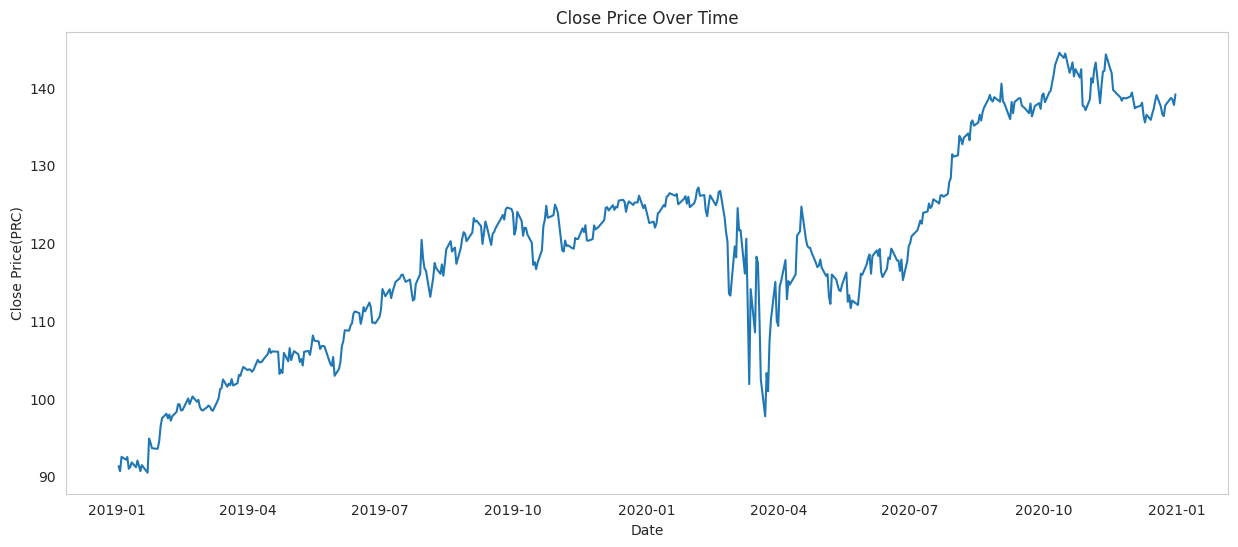

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['PRC'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price(PRC)')
plt.show()

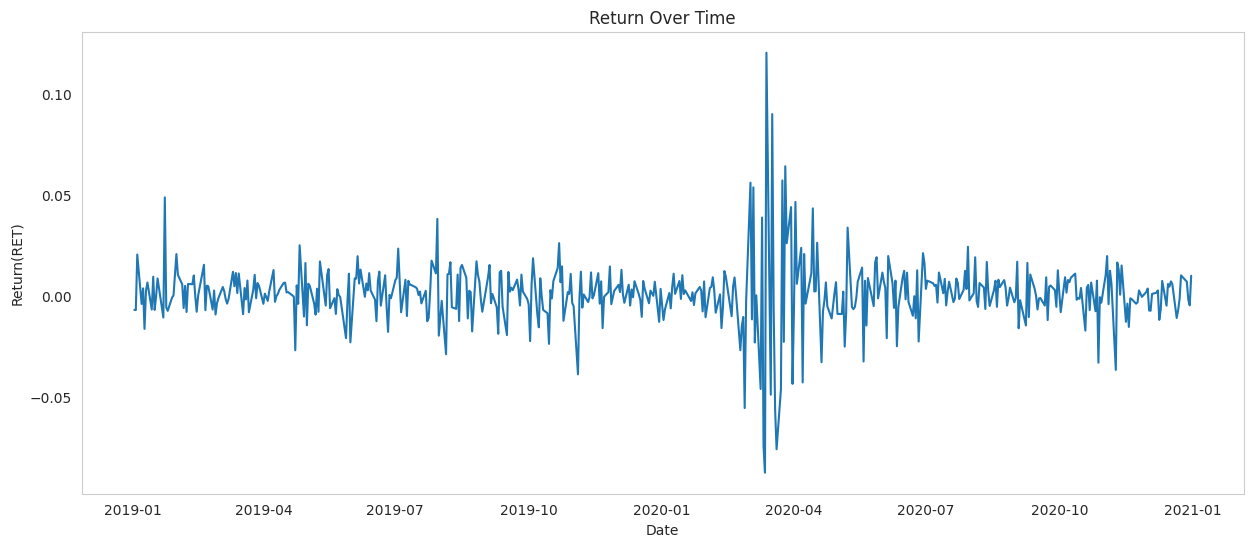

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['RET'])
plt.title('Return Over Time')
plt.xlabel('Date')
plt.ylabel('Return(RET)')
plt.show()

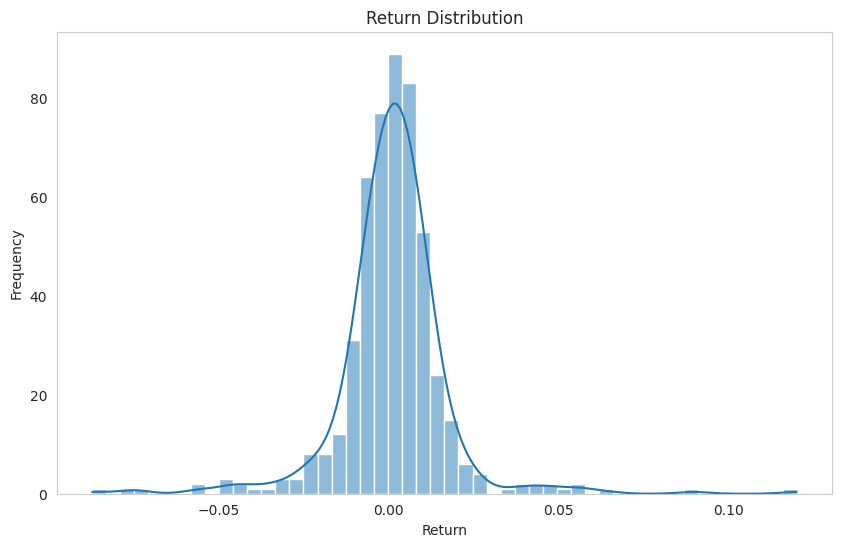

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RET'], bins=50, kde=True)
plt.title('Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

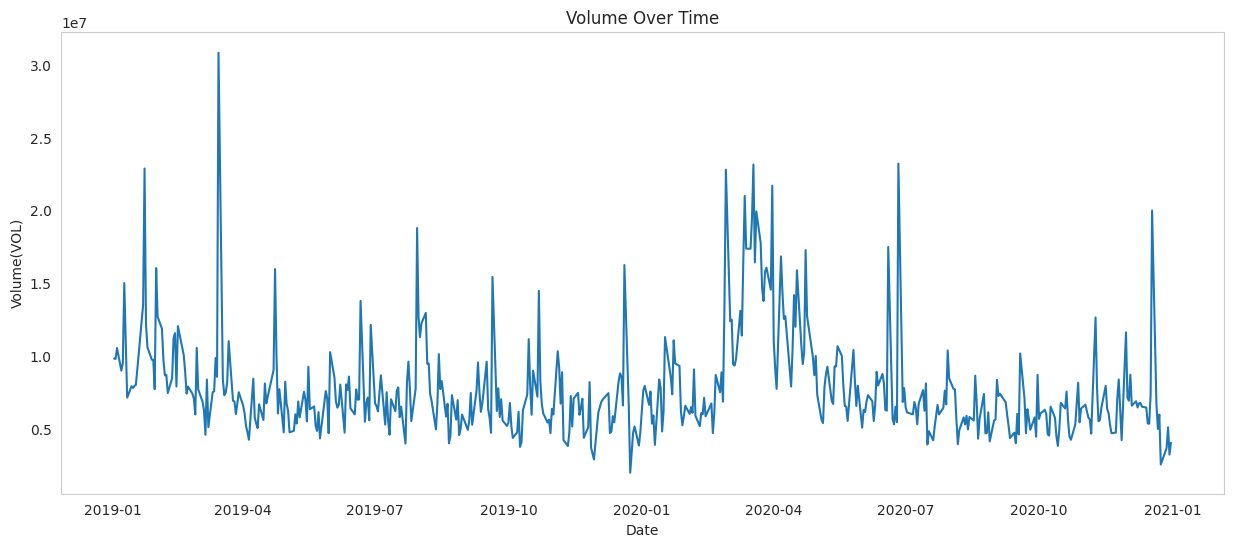

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['VOL'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume(VOL)')
plt.show()


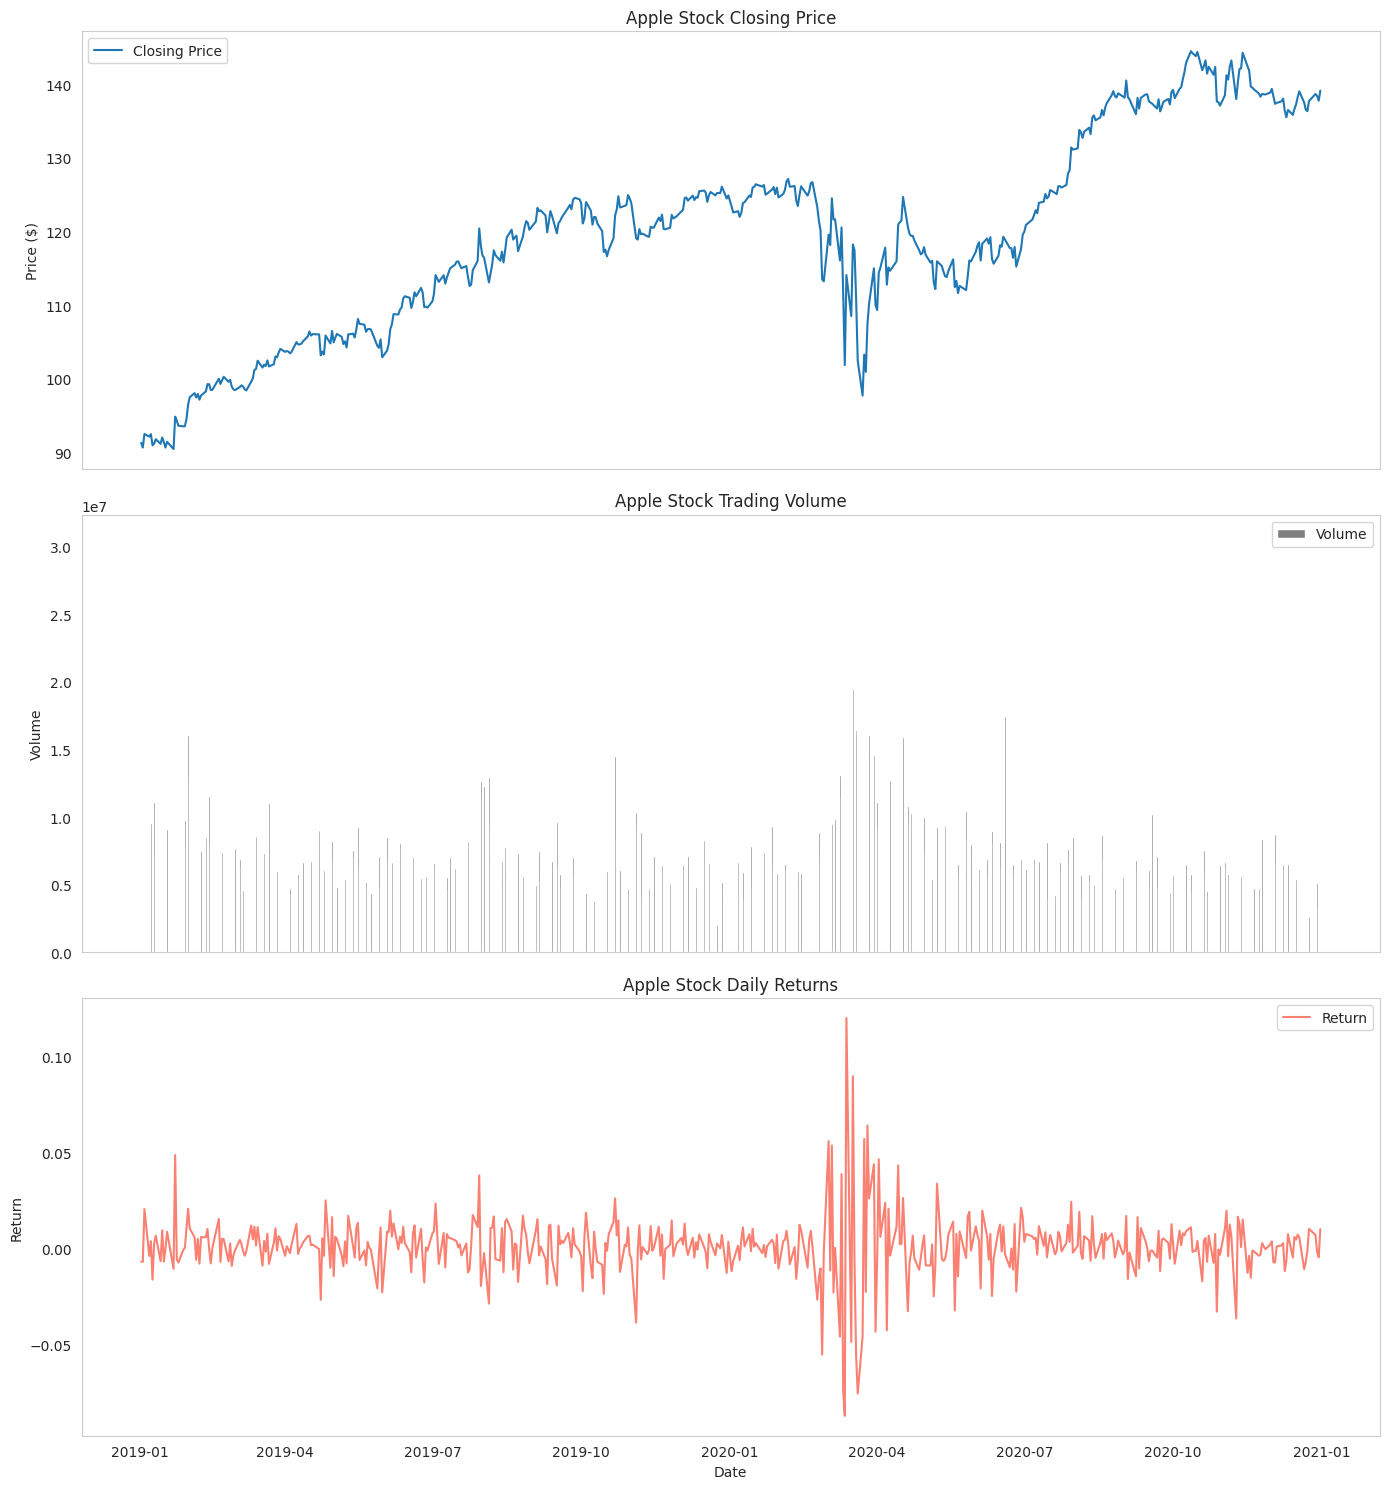

In [11]:
# Create a combined plot with three subplots on one figure, sharing the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Plot Closing Price on the first subplot
ax1.plot(df.index, df['PRC'], label='Closing Price')
ax1.set_title('Apple Stock Closing Price')
ax1.set_ylabel('Price ($)')
ax1.legend()

# Plot Volume on the second subplot
ax2.bar(df.index, df['VOL'], label='Volume', color='grey')
ax2.set_title('Apple Stock Trading Volume')
ax2.set_ylabel('Volume')
ax2.legend()

# Plot Returns on the third subplot
ax3.plot(df.index, df['RET'], label='Return', color='salmon')
ax3.set_title('Apple Stock Daily Returns')
ax3.set_ylabel('Return')
ax3.set_xlabel('Date')
ax3.legend()

# Improve layout and show plot
plt.tight_layout()
plt.show()


In [12]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.5 MB/s eta 0:00:00


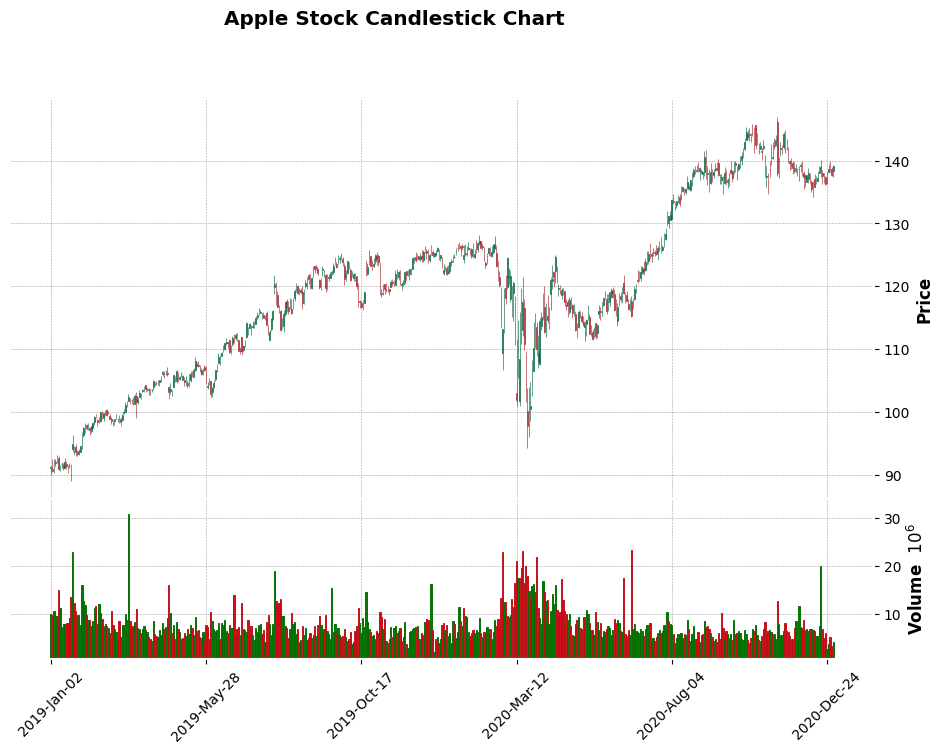

In [13]:
import mplfinance as mpf
temp_df = df.copy()
temp_df.rename(columns={
    'OPENPRC': 'Open',
    'ASKHI': 'High',
    'BIDLO': 'Low',
    'PRC': 'Close',
    'VOL': 'Volume'
}, inplace=True)

# Create a candlestick chart with volume using the temporary DataFrame
mpf.plot(temp_df[['Open', 'High', 'Low', 'Close', 'Volume']],
         type='candle',
         style='charles',
         title='Apple Stock Candlestick Chart',
         volume=True,
         figsize=(12, 8))

# Display the plot
mpf.show()


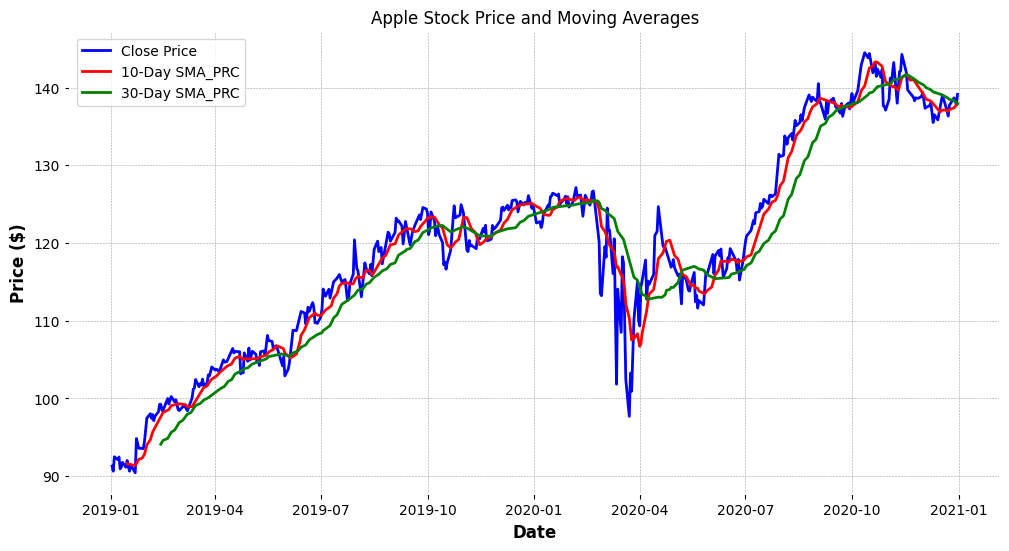

In [14]:
df['SMA_10_PRC'] = df['PRC'].rolling(window=10).mean()
df['SMA_30_PRC'] = df['PRC'].rolling(window=30).mean()

# Plotting the close price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRC'], label='Close Price', color='blue')
plt.plot(df.index, df['SMA_10_PRC'], label='10-Day SMA_PRC', color='red')
plt.plot(df.index, df['SMA_30_PRC'], label='30-Day SMA_PRC', color='green')

# Adding titles and labels
plt.title('Apple Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


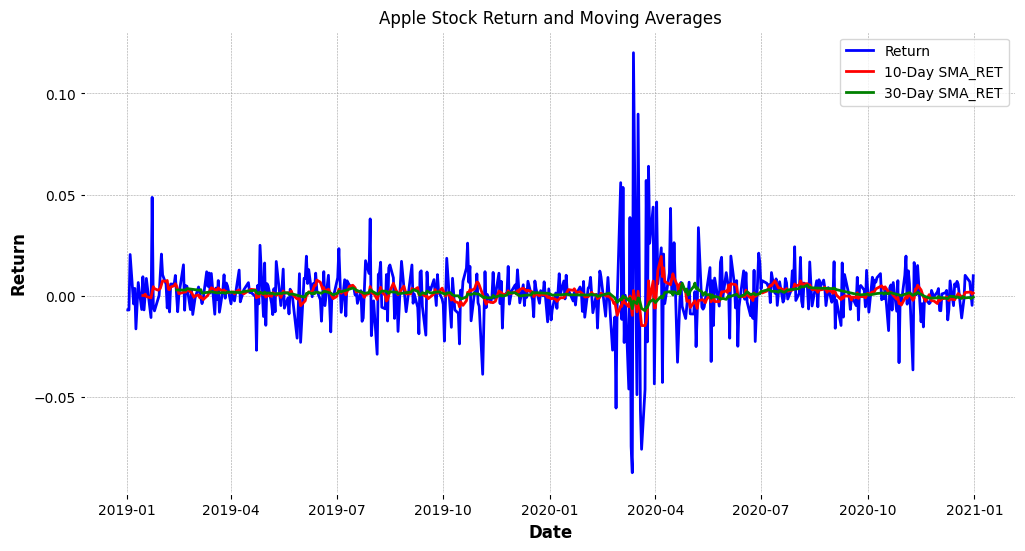

In [15]:
df['SMA_10_RET'] = df['RET'].rolling(window=10).mean()
df['SMA_30_RET'] = df['RET'].rolling(window=30).mean()

# Plotting the close price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RET'], label='Return', color='blue')
plt.plot(df.index, df['SMA_10_RET'], label='10-Day SMA_RET', color='red')
plt.plot(df.index, df['SMA_30_RET'], label='30-Day SMA_RET', color='green')

# Adding titles and labels
plt.title('Apple Stock Return and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


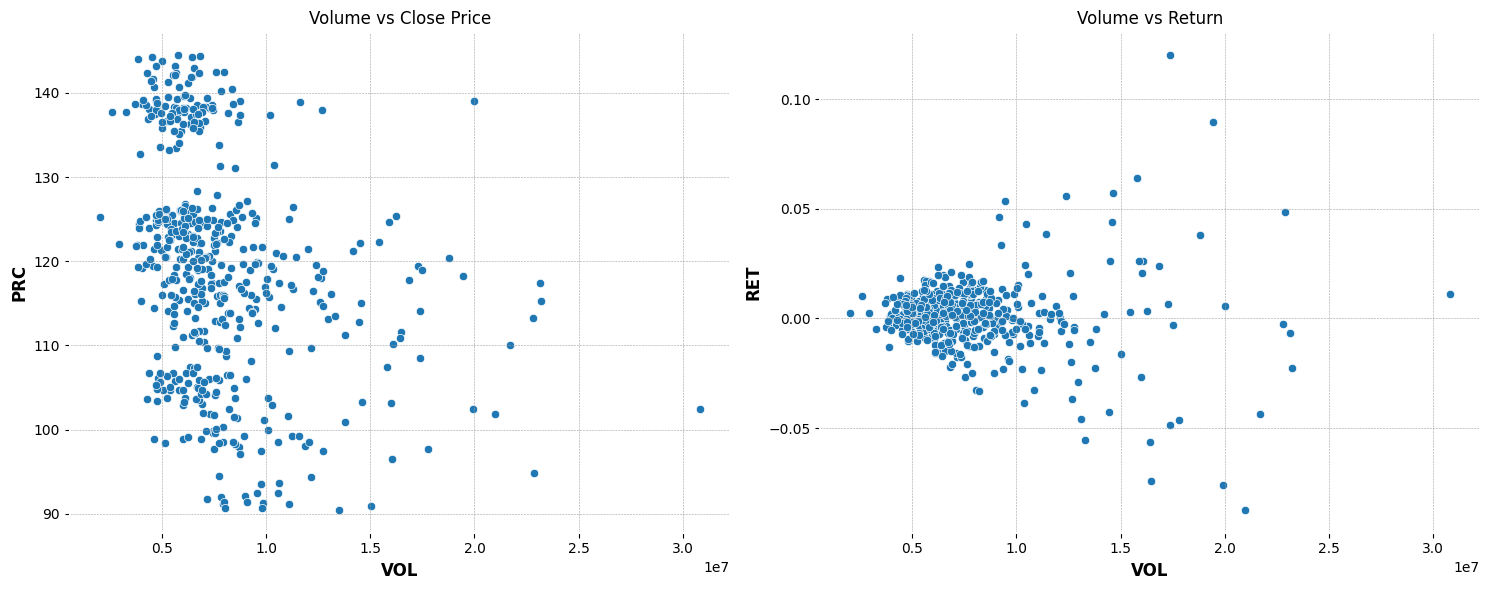

In [16]:
# Create a figure and two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for 'Volume vs Close Price'
sns.scatterplot(x='VOL', y='PRC', data=df, ax=axes[0])
axes[0].set_title('Volume vs Close Price')

# Scatter plot for 'Volume vs Return'
sns.scatterplot(x='VOL', y='RET', data=df, ax=axes[1])
axes[1].set_title('Volume vs Return')

# Display the plots
plt.tight_layout()
plt.show()



*   Volume vs. Price




A high trading volume can be associated with significant price events like earnings announcements or other market news, which could explain the spread in prices at higher volumes. If prices are generally higher at higher volumes, it may suggest periods of bullish sentiment, whereas lower volumes might indicate less trading confidence or interest.
*   Volume vs. Return

While volume increases may correspond to more significant price movements (not necessarily leading to positive returns), the overall returns do not dramatically shift from zero. It suggests that higher volumes are not consistently associated with positive or negative returns but rather with increased activity that could go either way, depending on other market conditions or news.



In [17]:
df.drop(columns=['SMA_10_PRC', 'SMA_30_PRC', 'SMA_10_RET', 'SMA_30_RET'], inplace=True)

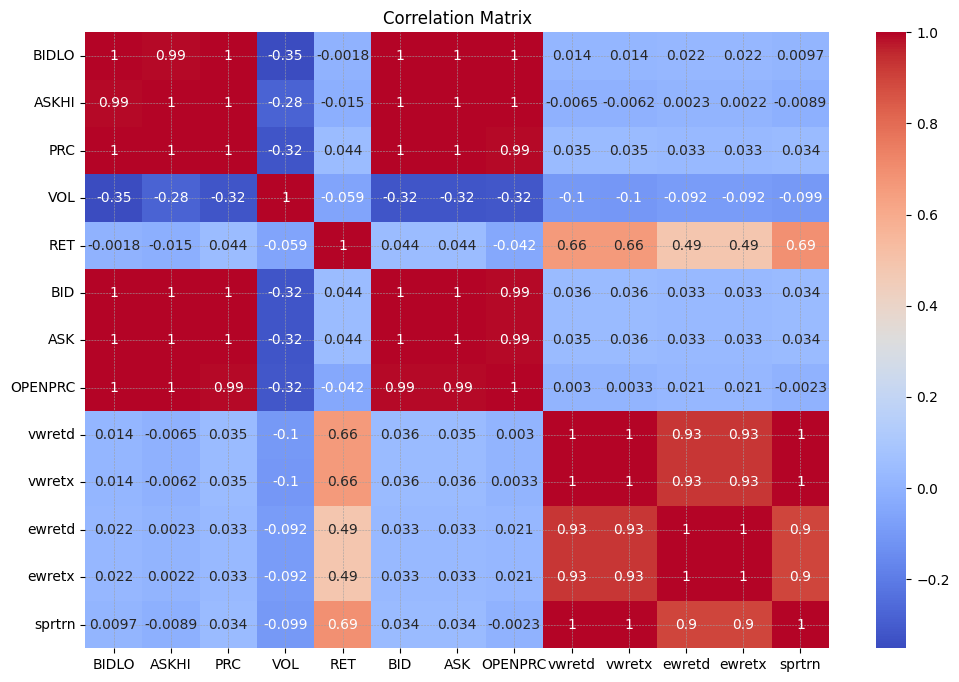

In [18]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for VIF calculation (necessary as VIF assumes a model intercept)
numeric_df = add_constant(numeric_df)

# Calculate VIF values
VIFs = pd.Series([variance_inflation_factor(numeric_df.values, i)
                  for i in range(numeric_df.shape[1])],
                 index=numeric_df.columns)

# Print VIF values
print("Variance Inflation Factors:")
print(VIFs)

Variance Inflation Factors:
const         130.992944
BIDLO         526.300793
ASKHI         441.611686
PRC        105357.504465
VOL             1.950337
RET             5.757205
BID        328830.821239
ASK        384613.487003
OPENPRC       471.989298
vwretd      86808.762351
vwretx      88038.006064
ewretd      68237.754932
ewretx      68204.656170
sprtrn        403.252827
dtype: float64


# Prediction with Close Price (PRC)

In [20]:
df_prc = df[['PRC']]
df_prc.head(10)


PRC
date             
2019-01-02  91.28
2019-01-03  90.64
2019-01-04  92.49
2019-01-07  92.12
2019-01-08  92.46
2019-01-09  90.95
2019-01-10  91.17
2019-01-11  91.77
2019-01-14  91.15
2019-01-15  92.01

In [21]:
from sklearn.preprocessing import MinMaxScaler
import datetime

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled_prc = pd.DataFrame(scaler.fit_transform(df_prc), columns=df_prc.columns, index=df_prc.index)

In [22]:
def window_dataset(data, first_date_str, last_date_str, target_col='PRC', time_step=1):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    dates, X, y = [], [], []

    target_date = first_date
    while target_date <= last_date:
        if target_date not in data.index:
            target_date += datetime.timedelta(days=1)
            continue

        start_idx = data.index.get_loc(target_date)
        if start_idx + time_step + 1 >= len(data):
            break

        X.append(data.iloc[start_idx:start_idx + time_step].values)
        y.append(data.iloc[start_idx + time_step][target_col])
        dates.append(target_date)

        next_week = data.loc[target_date:target_date + datetime.timedelta(days=7)]
        if len(next_week) < 2:
            break

        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if target_date == last_date:
            break

        target_date = next_date

    return np.array(dates), np.array(X).astype(np.float32), np.array(y).astype(np.float32)


In [23]:
time_step = 90 #Adjust as needed for actural data
dates, X, y = window_dataset(df_scaled_prc, '2019-01-02', '2020-12-31', target_col='PRC', time_step = time_step)
print("Dates:", dates.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)

Dates: (414,)
X shape: (414, 90, 1)
y shape: (414,)


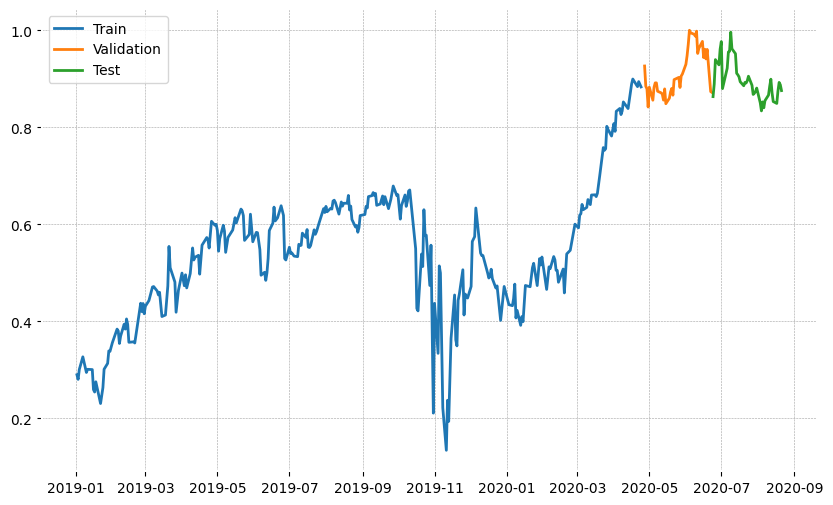

In [24]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluate_performance(true_values, predictions, dataset_type="Dataset"):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predictions)

    print(f"{dataset_type} Performance:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print("")

## ARIMA Prediction



In [26]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

def evaluate_arima_model(order):
    # Fit ARIMA model
    train_series = pd.Series(y_train, index=dates_train)
    model = ARIMA(train_series, order=order)
    model_fit = model.fit()

    # Forecasting beyond the training data
    n_forecast_val = len(dates_val)

    # Get forecast for validation set
    val_forecast = model_fit.get_forecast(steps=n_forecast_val)
    val_pred = val_forecast.predicted_mean

    # Inverse transform the predictions
    val_pred_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
    y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # Calculate MSE and MAE for validation set
    val_mse = mean_squared_error(y_val_inv, val_pred_inv)
    val_mae = mean_absolute_error(y_val_inv, val_pred_inv)

    return val_mse, val_mae

# Grid search for ARIMA parameters
best_order = None
best_mse = float("inf")
best_mae = float("inf")

for p in range(6):
    for d in range(3):
        for q in range(6):
            order = (p, d, q)
            try:
                mse, mae = evaluate_arima_model(order)
                if mse < best_mse:
                    best_mse = mse
                    best_mae = mae
                    best_order = order
                print(f'Order {order} - Validation MSE: {mse}, Validation MAE: {mae}')
            except:
                continue

print(f'Best order: {best_order} - Validation MSE: {best_mse}, Validation MAE: {best_mae}')

Order (0, 0, 0) - Validation MSE: 410.10877165145087, Validation MAE: 20.08912242859605
Order (0, 0, 1) - Validation MSE: 402.40233436489257, Validation MAE: 19.853988876657233
Order (0, 0, 2) - Validation MSE: 396.97636353425764, Validation MAE: 19.667281227600874
Order (0, 0, 3) - Validation MSE: 392.0735053520361, Validation MAE: 19.487637588059677
Order (0, 0, 4) - Validation MSE: 388.0115690662343, Validation MAE: 19.32274114336137
Order (0, 0, 5) - Validation MSE: 382.776754087182, Validation MAE: 19.101290163887143
Order (0, 1, 0) - Validation MSE: 8.886578166656133, Validation MAE: 2.197562918606688
Order (0, 1, 1) - Validation MSE: 8.788531462111246, Validation MAE: 2.193622007123458
Order (0, 1, 2) - Validation MSE: 8.80813574853335, Validation MAE: 2.1943624728555724
Order (0, 1, 3) - Validation MSE: 8.804092168880384, Validation MAE: 2.1966808557370134
Order (0, 1, 4) - Validation MSE: 9.294044755045324, Validation MAE: 2.2234133565741
Order (0, 1, 5) - Validation MSE: 8.99

In [27]:
# Fit the best ARIMA model on the entire training data
train_series = pd.Series(y_train, index=dates_train)
best_model = ARIMA(train_series, order=best_order)
best_model_fit = best_model.fit()

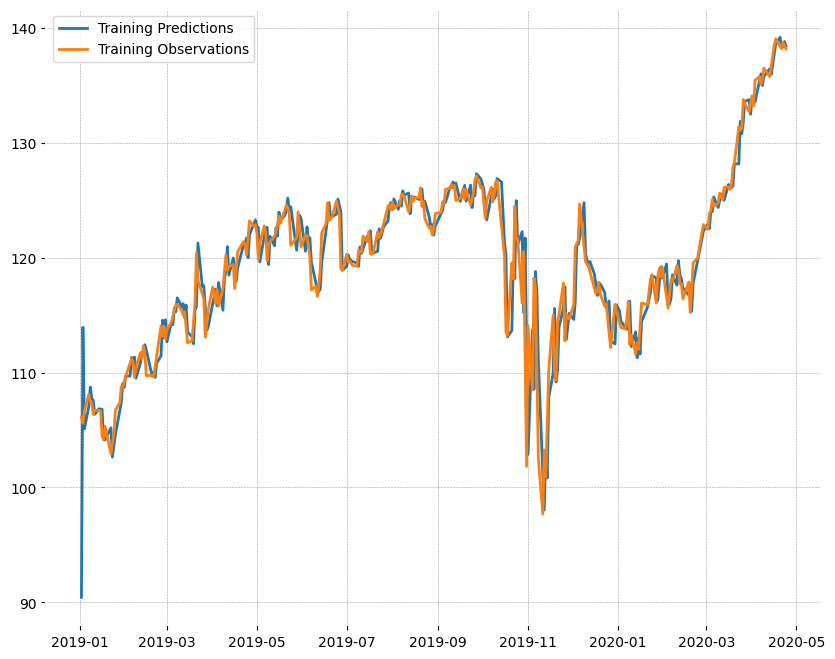

ARIMA Training Performance:
MSE: 5.362158249074728
RMSE: 2.3156334444541797
MAE: 1.4048315886545792



In [28]:
# Predicting and inverse transforming for training data
train_predictions_arima = best_model_fit.predict(start=0, end=len(dates_train)-1, typ='levels')
train_arima_inv = scaler.inverse_transform(train_predictions_arima.values.reshape(-1, 1)).flatten()
y_train_arima_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_arima_inv)
plt.plot(dates_train, y_train_arima_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_arima_inv, train_arima_inv, "ARIMA Training")

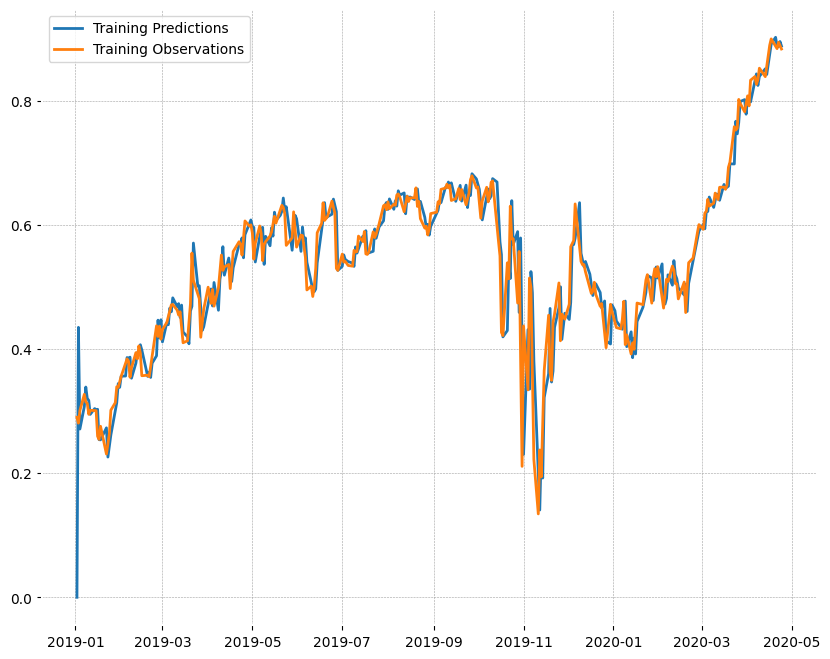

ARIMA Training Performance:
MSE: 0.0018354730814338386
RMSE: 0.042842421516924536
MAE: 0.025991327310491464



In [29]:
# Predicting for training data without inverse transforming
train_predictions_arima = best_model_fit.predict(start=0, end=len(dates_train)-1, typ='levels')

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_arima.values)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_train, train_predictions_arima.values, "ARIMA Training")


In [30]:
n_forecast_val = len(dates_val)
n_forecast_test = len(dates_test)

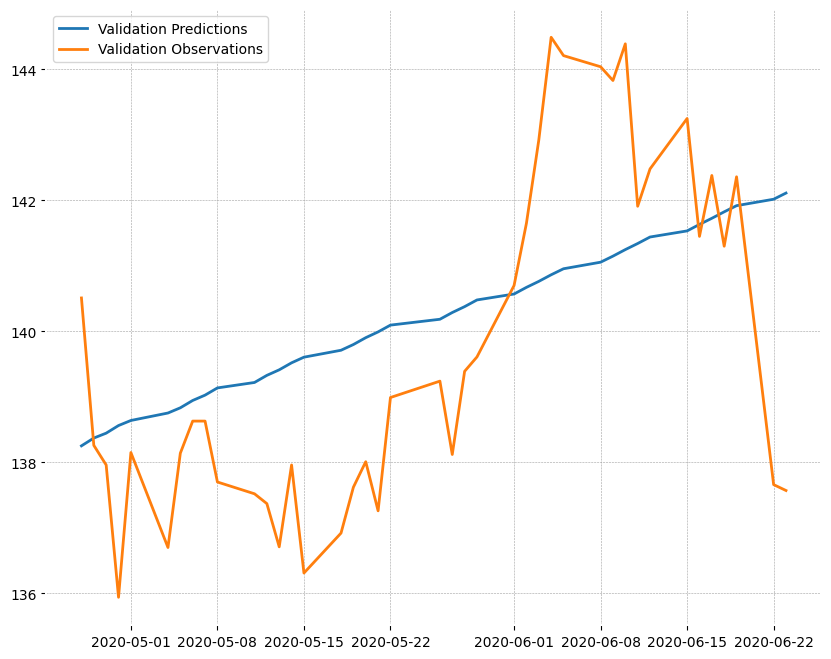

ARIMA Validation Performance:
MSE: 4.3696577498711555
RMSE: 2.0903726342140905
MAE: 1.7249988971127246



In [31]:
# Predicting and inverse transforming for validation data
val_forecast = best_model_fit.get_forecast(steps=n_forecast_val)
val_pred = val_forecast.predicted_mean
val_arima_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
y_val_arima_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_arima_inv)
plt.plot(dates_val, y_val_arima_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_arima_inv, val_arima_inv, "ARIMA Validation")

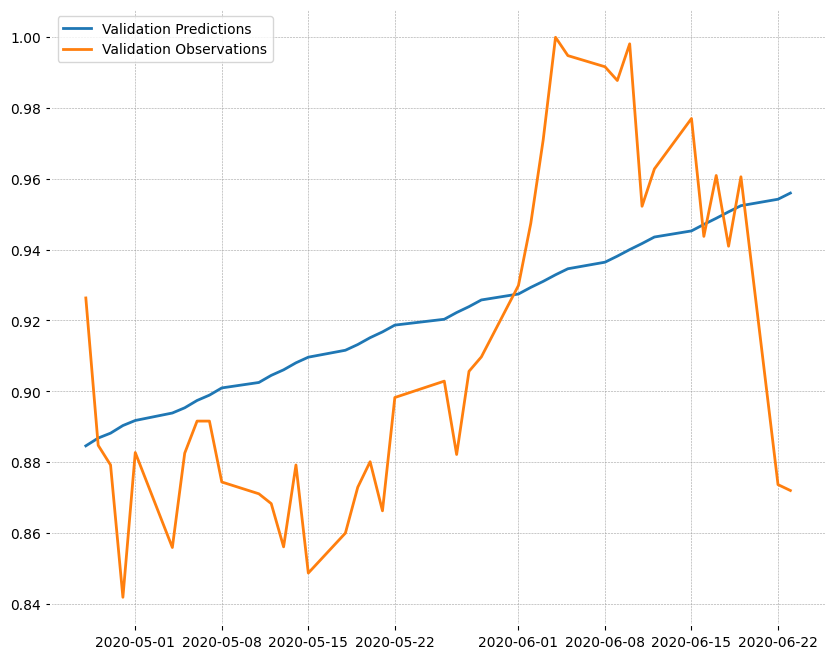

ARIMA Validation Performance:
MSE: 0.0014957400042836665
RMSE: 0.03867479805097457
MAE: 0.031914876886277796



In [32]:
# Predicting for validation data without inverse transforming
val_forecast = best_model_fit.get_forecast(steps=n_forecast_val)
val_pred = val_forecast.predicted_mean

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_pred.values)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_val, val_pred.values, "ARIMA Validation")


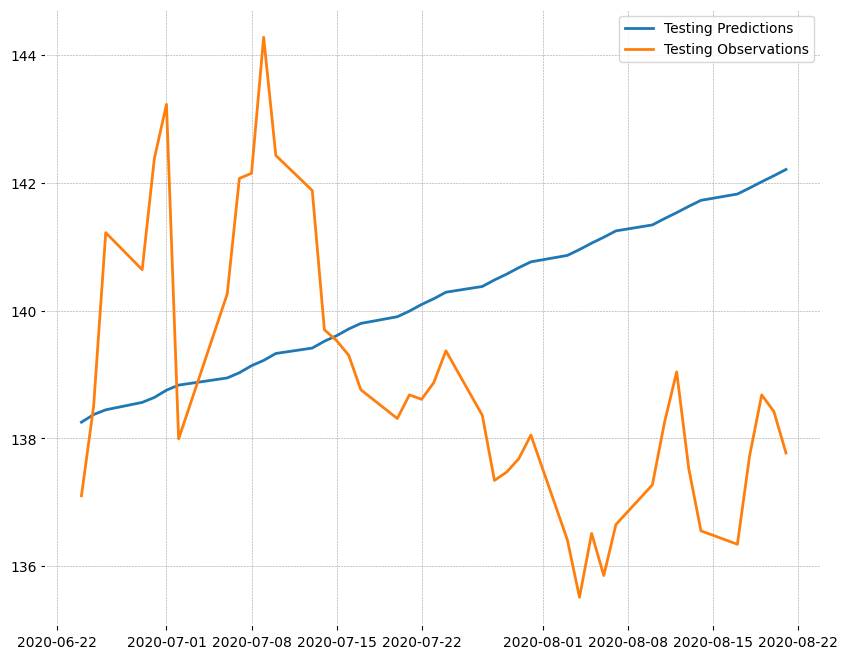

ARIMA Testing Performance:
MSE: 10.664672216367702
RMSE: 3.2656809728397693
MAE: 2.8577609448228265



In [33]:
# Predicting and inverse transforming for test data
test_forecast = best_model_fit.get_forecast(steps=n_forecast_test)
test_pred = test_forecast.predicted_mean
test_arima_inv = scaler.inverse_transform(test_pred.values.reshape(-1, 1)).flatten()
y_test_arima_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_arima_inv)
plt.plot(dates_test, y_test_arima_inv)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_test_arima_inv, test_arima_inv, "ARIMA Testing")

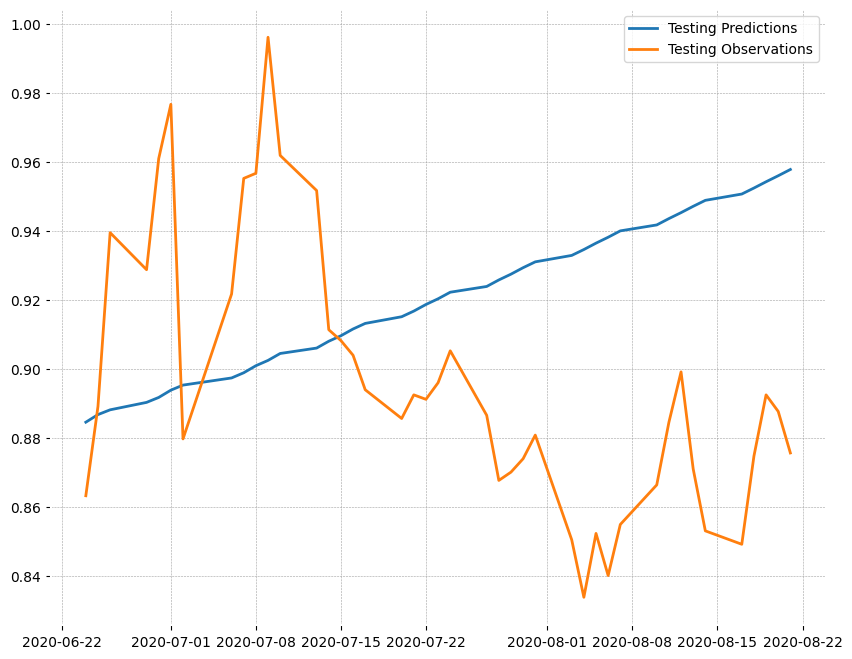

ARIMA Testing Performance:
MSE: 0.003650533544627511
RMSE: 0.060419645353374185
MAE: 0.05287256482563661



In [34]:
# Predicting for test data without inverse transforming
test_forecast = best_model_fit.get_forecast(steps=n_forecast_test)
test_pred = test_forecast.predicted_mean

# Plotting test data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_pred.values)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_test, test_pred.values, "ARIMA Testing")


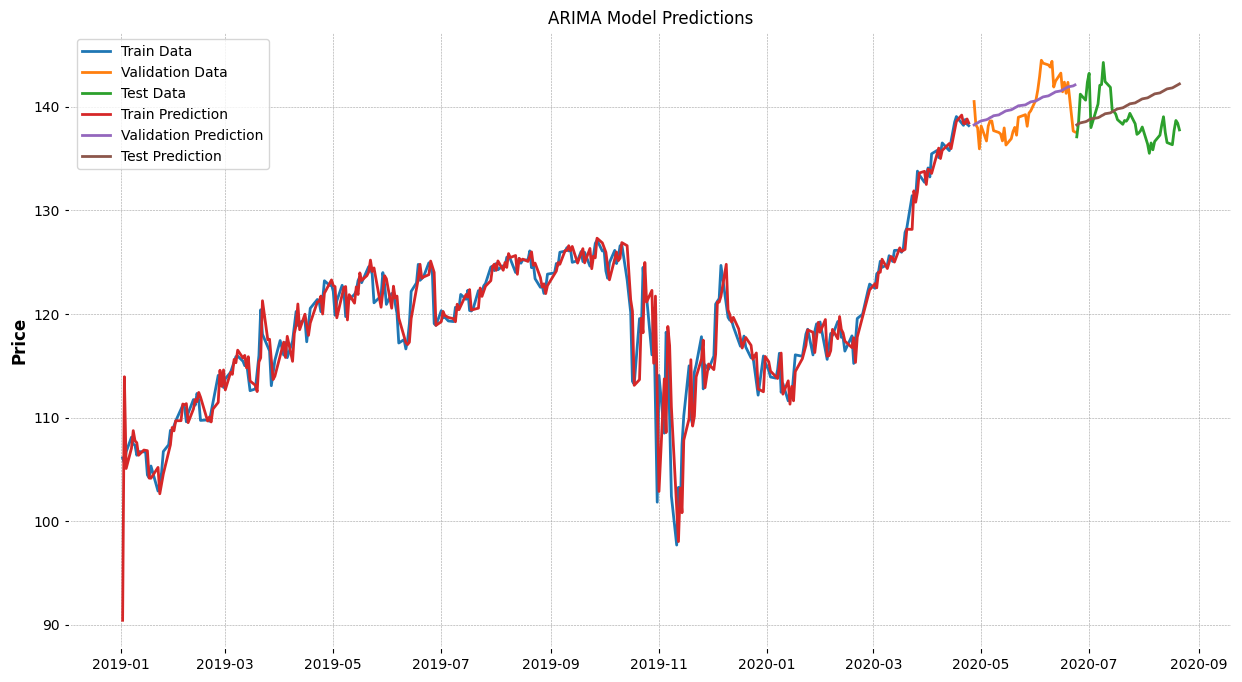

In [35]:
# Plot the predictions
plt.figure(figsize=(15, 8))
plt.plot(dates_train, y_train_arima_inv, label='Train Data')
plt.plot(dates_val, y_val_arima_inv, label='Validation Data')
plt.plot(dates_test, y_test_arima_inv, label='Test Data')
plt.plot(dates_train, train_arima_inv, label='Train Prediction')
plt.plot(dates_val, val_arima_inv, label='Validation Prediction')
plt.plot(dates_test, test_arima_inv, label='Test Prediction')
plt.title('ARIMA Model Predictions')
plt.ylabel('Price')
plt.legend()
plt.show()


## LSTM Prediction

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((90, 1)),
            layers.LSTM(64),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(1)
          ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.2609 - mean_absolute_error: 0.4891 - val_loss: 0.2068 - val_mean_absolute_error: 0.4529
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0327 - mean_absolute_error: 0.1527 - val_loss: 0.0290 - val_mean_absolute_error: 0.1659
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0083 - mean_absolute_error: 0.0711 - val_loss: 0.0241 - val_mean_absolute_error: 0.1506
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0059 - mean_absolute_error: 0.0541 - val_loss: 0.0120 - val_mean_absolute_error: 0.1031
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0046 - mean_absolute_error: 0.0515 - val_loss: 0.0182 - val_mean_absolute_error: 0.1298
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0046 - mean_absolute_error: 0.0489 - val_loss: 0.0106 - val_mean_absolute_error: 0.0962
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0039 - mean_absolute_error: 0.0446 - v

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


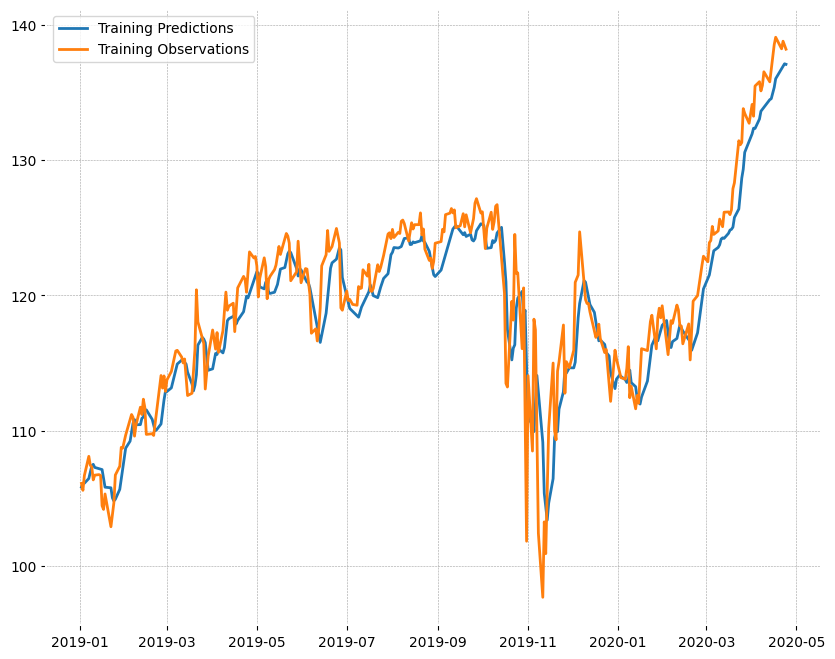

LSTM Training Performance:
MSE: 6.246927261352539
RMSE: 2.499385356903076
MAE: 1.844419002532959



In [37]:
# Predicting and inverse transforming for training data
train_predictions = model.predict(X_train).flatten()
train_predictions_inv = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_inv)
plt.plot(dates_train, y_train_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

evaluate_performance(y_train_inv, train_predictions_inv, "LSTM Training")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


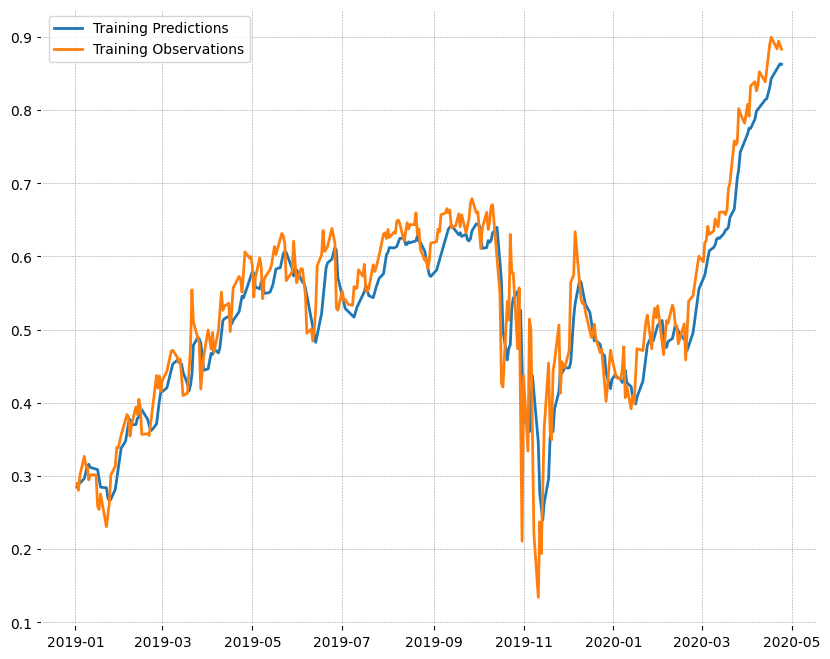

LSTM Training Performance:
MSE: 0.0021383303683251143
RMSE: 0.046242084354162216
MAE: 0.03412430360913277



In [38]:
# Predicting training data without inverse transforming
train_predictions = model.predict(X_train).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

evaluate_performance(y_train, train_predictions, "LSTM Training")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


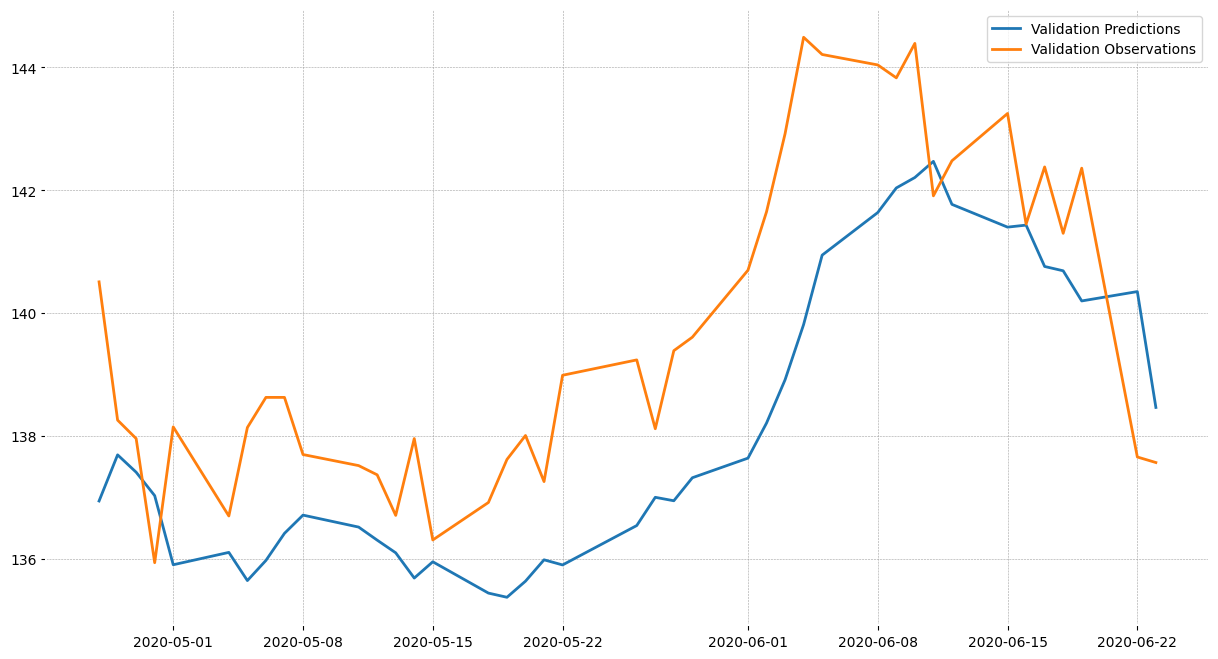

LSTM Validation Performance:
MSE: 4.728837966918945
RMSE: 2.174589157104492
MAE: 1.8819952011108398



In [39]:
# Predicting and inverse transforming for validation data
val_predictions = model.predict(X_val).flatten()
val_predictions_inv = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Plotting validation data
plt.figure(figsize=(15, 8))
plt.plot(dates_val, val_predictions_inv)
plt.plot(dates_val, y_val_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

evaluate_performance(y_val_inv, val_predictions_inv, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


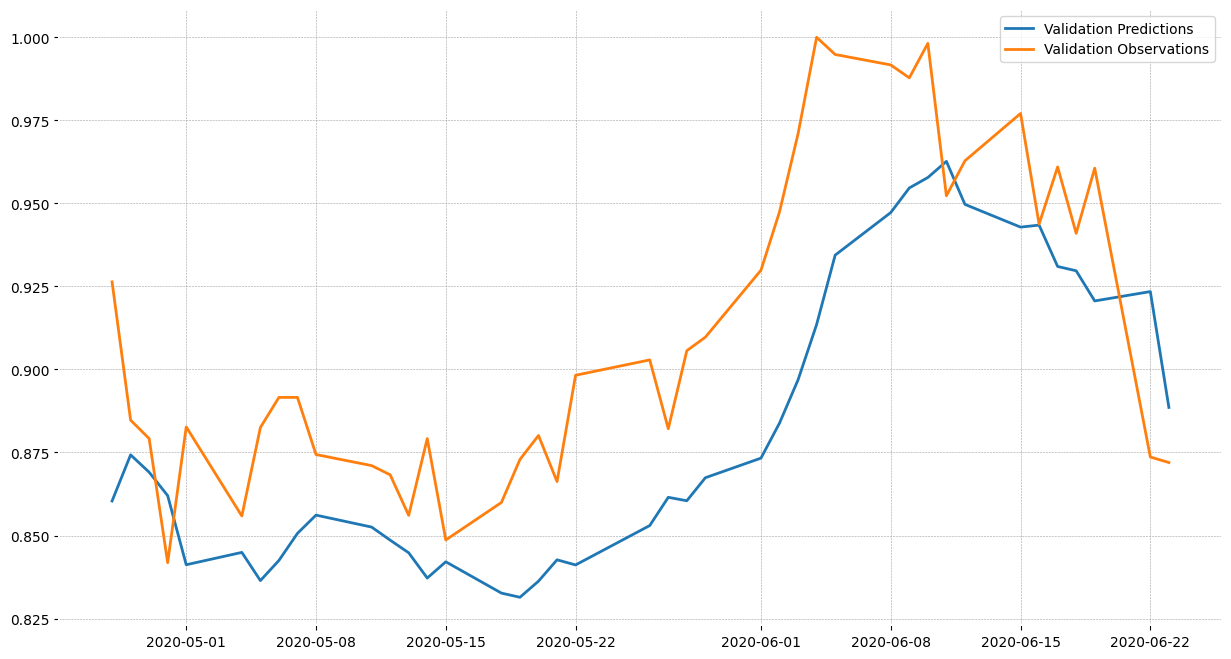

LSTM Validation Performance:
MSE: 0.0016186853172257543
RMSE: 0.04023288935422897
MAE: 0.034819480031728745



In [40]:
# Predicting validation data without inverse transforming
val_predictions = model.predict(X_val).flatten()

# Plotting validation data
plt.figure(figsize=(15, 8))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

evaluate_performance(y_val, val_predictions, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


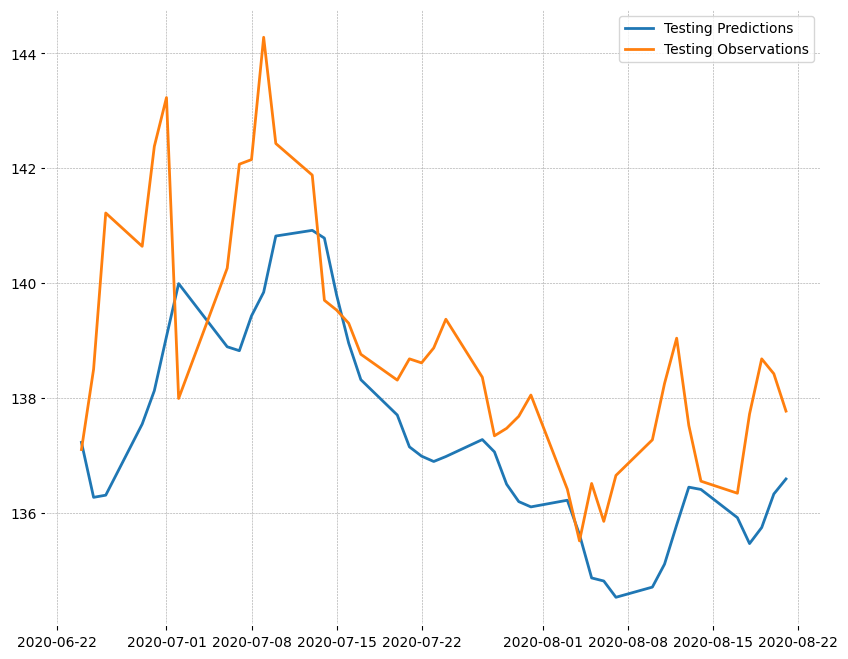

LSTM Testing Performance:
MSE: 4.814026832580566
RMSE: 2.19408917427063
MAE: 1.7942733764648438



In [41]:
# Predicting and inverse transforming for test data
test_predictions = model.predict(X_test).flatten()
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions_inv)
plt.plot(dates_test, y_test_inv)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv, test_predictions_inv, "LSTM Testing")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


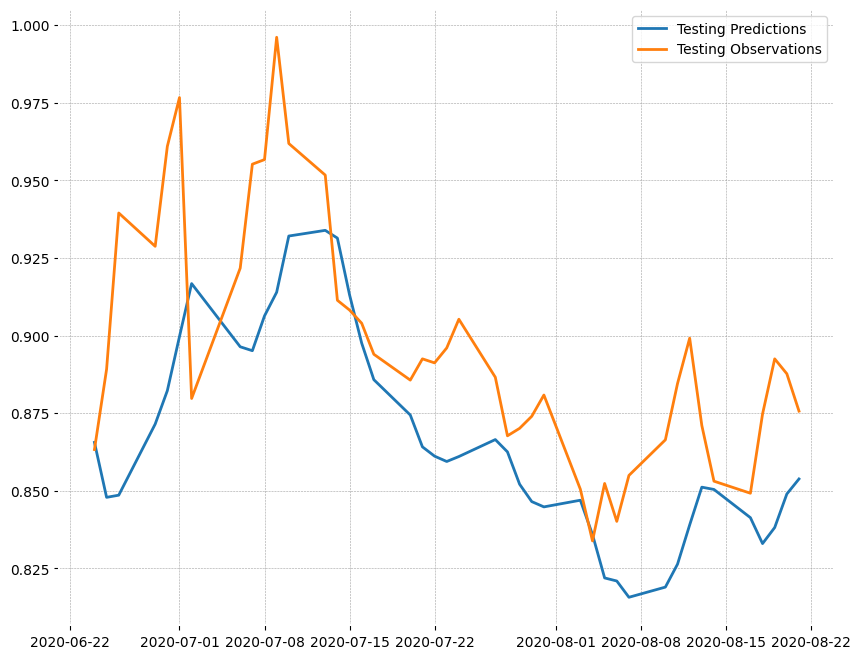

LSTM Testing Performance:
MSE: 0.001647845609113574
RMSE: 0.04059366509318352
MAE: 0.03319651260972023



In [42]:
# Predicting for test data without inverse transforming
test_predictions = model.predict(X_test).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

evaluate_performance(y_test, test_predictions, "LSTM Testing")


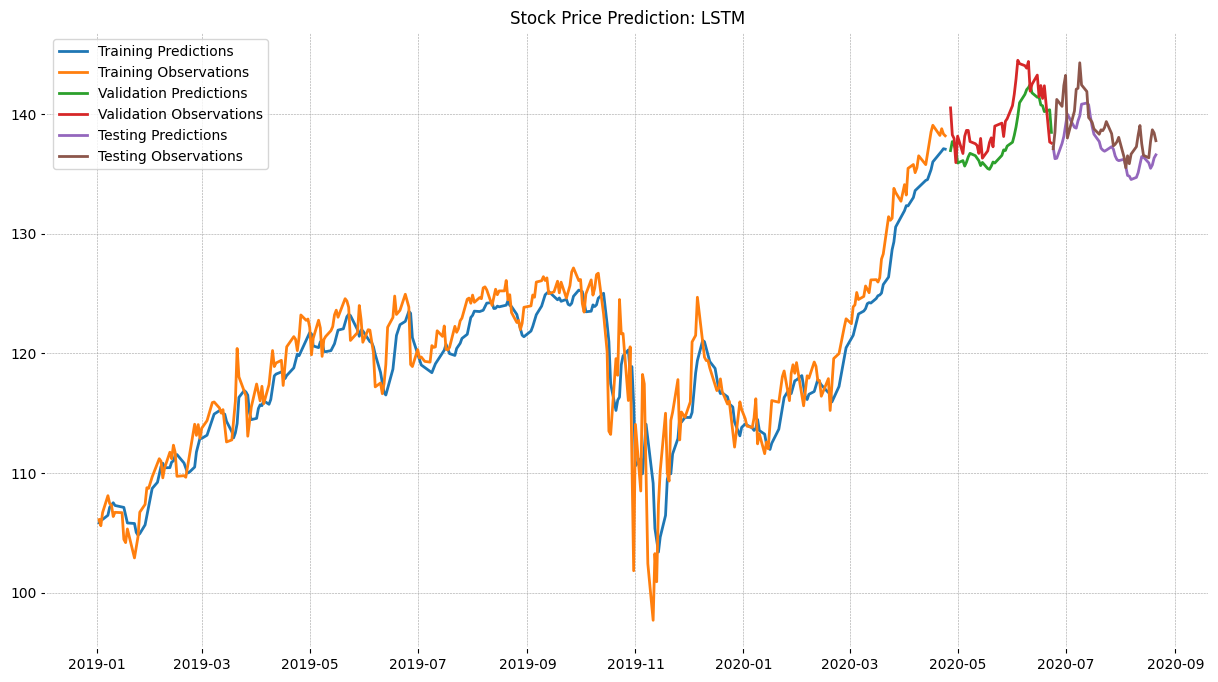

In [43]:
plt.figure(figsize=(15, 8))
plt.plot(dates_train, train_predictions_inv, label='Training Predictions')
plt.plot(dates_train, y_train_inv, label='Training Observations')
plt.plot(dates_val, val_predictions_inv, label='Validation Predictions')
plt.plot(dates_val, y_val_inv, label='Validation Observations')
plt.plot(dates_test, test_predictions_inv, label='Testing Predictions')
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.title('Stock Price Prediction: LSTM')
plt.legend()
plt.show()

## SVR Prediction

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
# Combine train and validation sets for hyperparameter tuning
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# # Reshape for GridSearchCV
X_train_val = X_train_val.reshape(-1, time_step)
X_test = X_test.reshape(-1, time_step)

# Define the SVR model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the SVR model using the best parameters
best_svr = grid_search.best_estimator_


Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found: {'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}


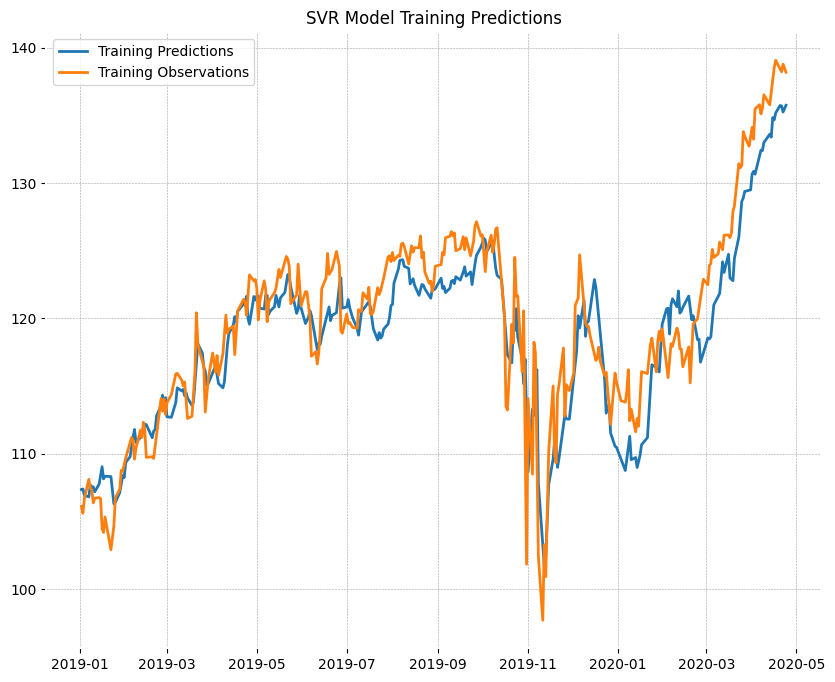

SVR Training Performance:
MSE: 8.061252729566588
RMSE: 2.8392345323284918
MAE: 2.296395170904189



In [45]:
# Train predictions and evaluation
train_predictions_svr = best_svr.predict(X_train.reshape(-1, time_step))
train_svr_inv = scaler.inverse_transform(train_predictions_svr.reshape(-1, 1)).flatten()
y_train_svr_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_svr_inv)
plt.plot(dates_train, y_train_svr_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

evaluate_performance(y_train_svr_inv, train_svr_inv, "SVR Training")

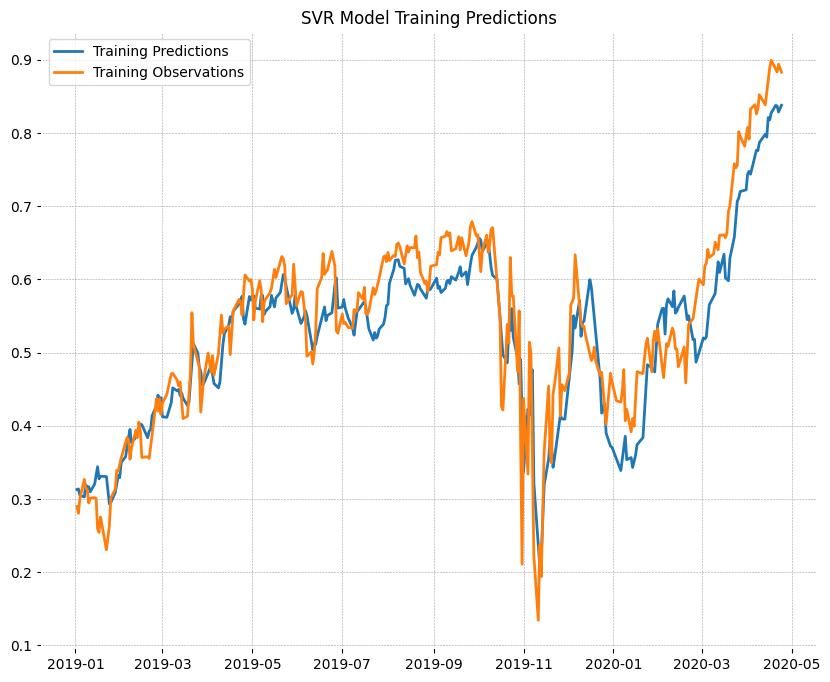

SVR Training Performance:
MSE: 0.0027593762937840292
RMSE: 0.05252976578839876
MAE: 0.04248648637802168



In [46]:
# Train predictions and evaluation without inverse transforming
train_predictions_svr = best_svr.predict(X_train.reshape(-1, time_step))

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_svr)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

evaluate_performance(y_train, train_predictions_svr, "SVR Training")

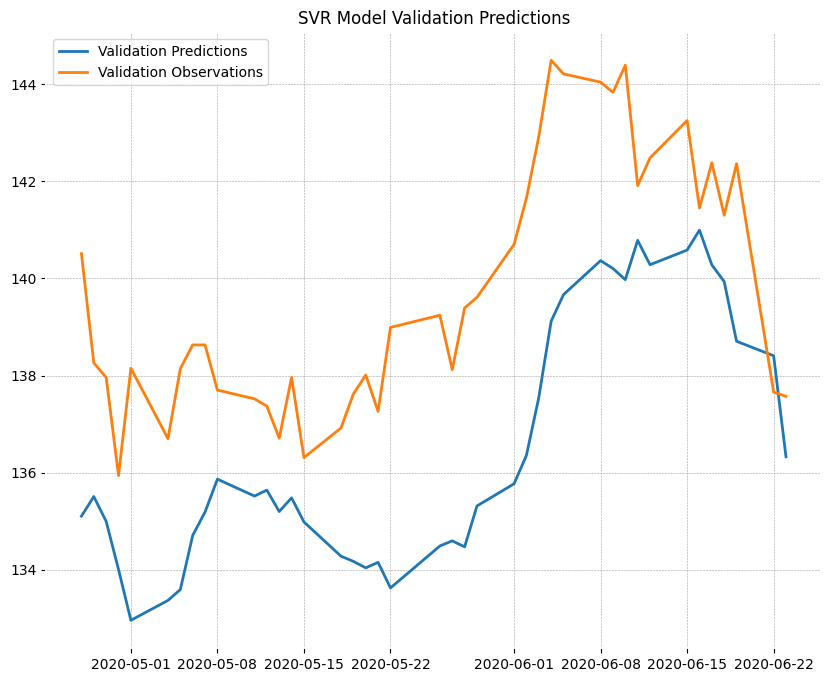

SVR Validation Performance:
MSE: 12.644720666113912
RMSE: 3.555941600492605
MAE: 3.2480576051747865



In [47]:
# Validation predictions and evaluation
val_predictions_svr = best_svr.predict(X_val.reshape(-1, time_step))
val_svr_inv = scaler.inverse_transform(val_predictions_svr.reshape(-1, 1)).flatten()
y_val_svr_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_svr_inv)
plt.plot(dates_val, y_val_svr_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

evaluate_performance(y_val_svr_inv, val_svr_inv, "SVR Validation")

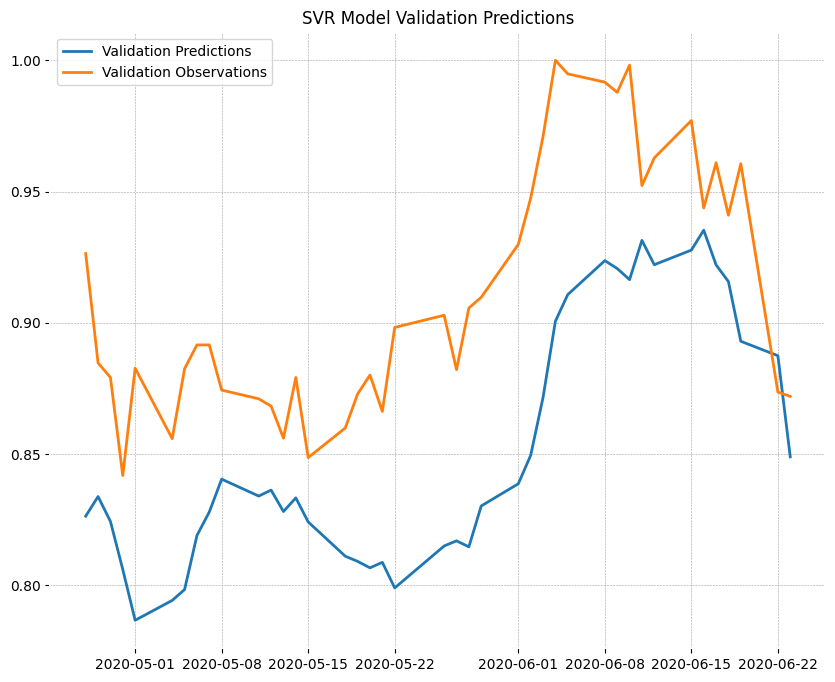

SVR Validation Performance:
MSE: 0.004328301331640194
RMSE: 0.06578982696162222
MAE: 0.06009354930645972



In [48]:
# Validation predictions and evaluation without inverse transforming
val_predictions_svr = best_svr.predict(X_val.reshape(-1, time_step))

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_predictions_svr)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

evaluate_performance(y_val, val_predictions_svr, "SVR Validation")



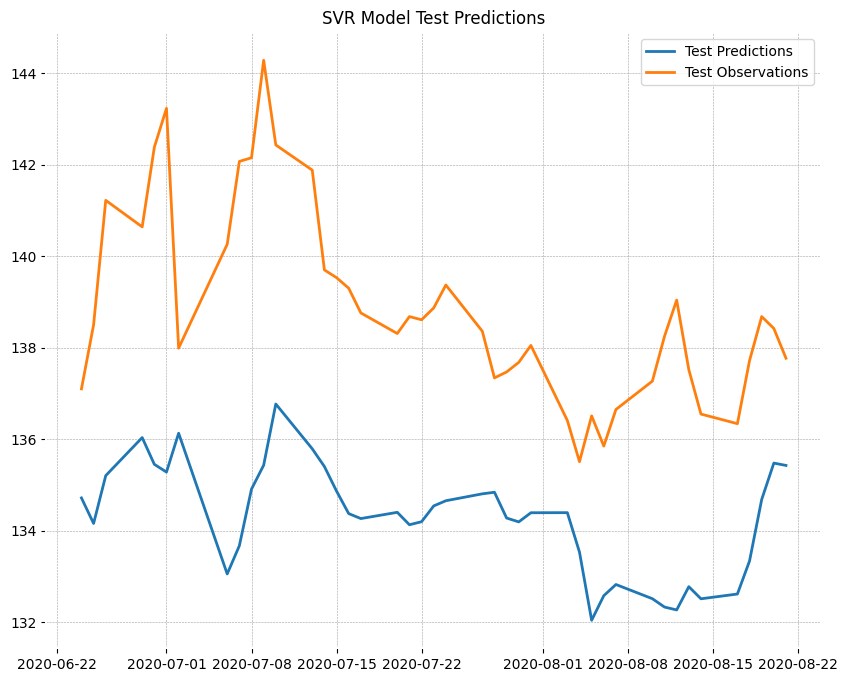

SVR Test Performance:
MSE: 24.11317004359942
RMSE: 4.910516270576793
MAE: 4.602915211660785



In [49]:
# Test predictions and evaluation
test_predictions_svr = best_svr.predict(X_test)
test_svr_inv = scaler.inverse_transform(test_predictions_svr.reshape(-1, 1)).flatten()
y_test_svr_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_svr_inv)
plt.plot(dates_test, y_test_svr_inv)
plt.legend(['Test Predictions', 'Test Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

evaluate_performance(y_test_svr_inv, test_svr_inv, "SVR Test")

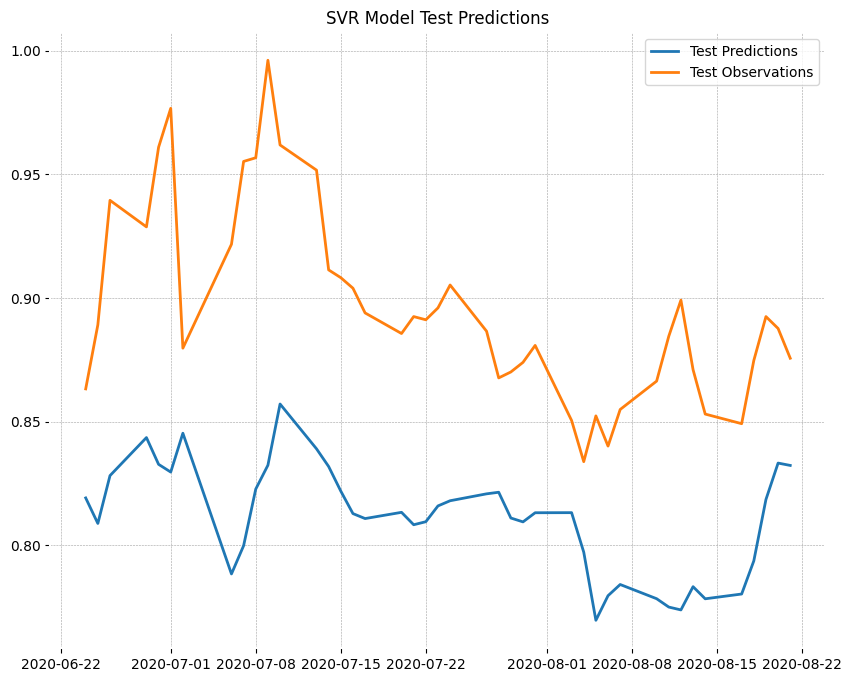

SVR Test Performance:
MSE: 0.008253963380547588
RMSE: 0.09085132569504745
MAE: 0.08516027783940566



In [50]:
# Test predictions and evaluation without inverse transforming
test_predictions_svr = best_svr.predict(X_test)

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions_svr)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

evaluate_performance(y_test, test_predictions_svr, "SVR Test")

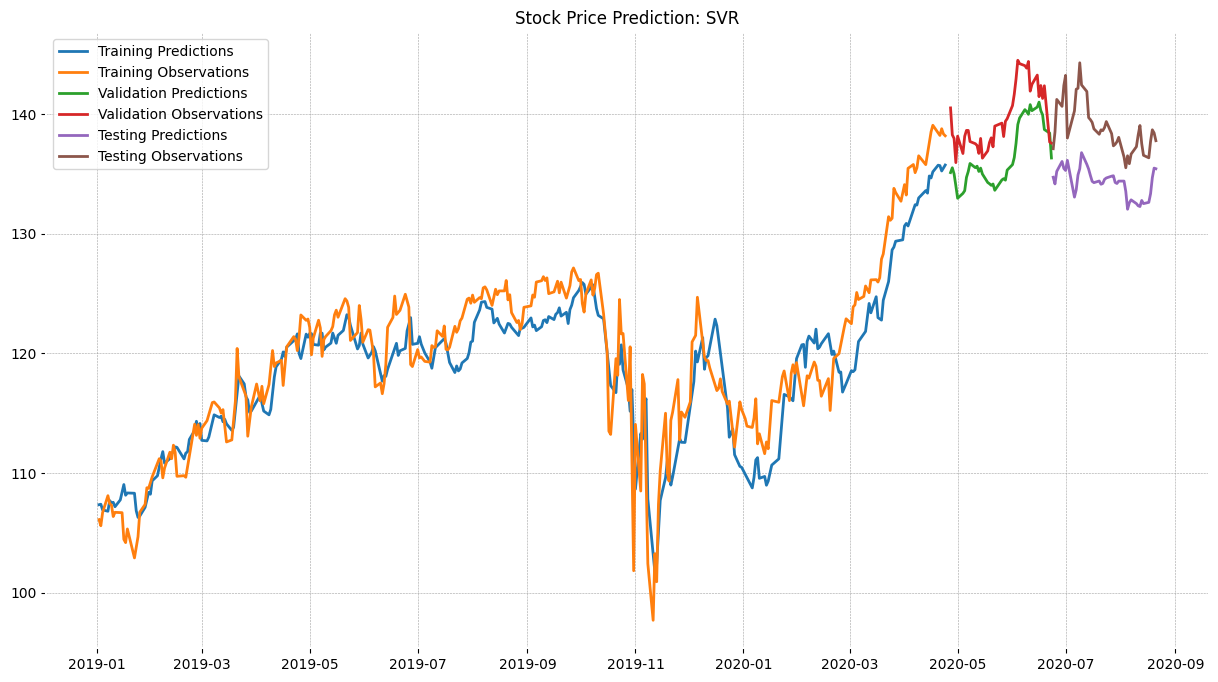

In [51]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_train, train_svr_inv, label='Training Predictions')
plt.plot(dates_train, y_train_svr_inv, label='Training Observations')
plt.plot(dates_val, val_svr_inv, label='Validation Predictions')
plt.plot(dates_val, y_val_svr_inv, label='Validation Observations')
plt.plot(dates_test, test_svr_inv, label='Testing Predictions')
plt.plot(dates_test, y_test_svr_inv, label='Testing Observations')
plt.title('Stock Price Prediction: SVR')
plt.legend()
plt.show()

## Summary Comparision

ARIMA Performance:
MSE: 10.664672216367702
RMSE: 3.2656809728397693
MAE: 2.8577609448228265

SVR Performance:
MSE: 24.11317004359942
RMSE: 4.910516270576793
MAE: 4.602915211660785

LSTM Performance:
MSE: 4.814026832580566
RMSE: 2.19408917427063
MAE: 1.7942733764648438



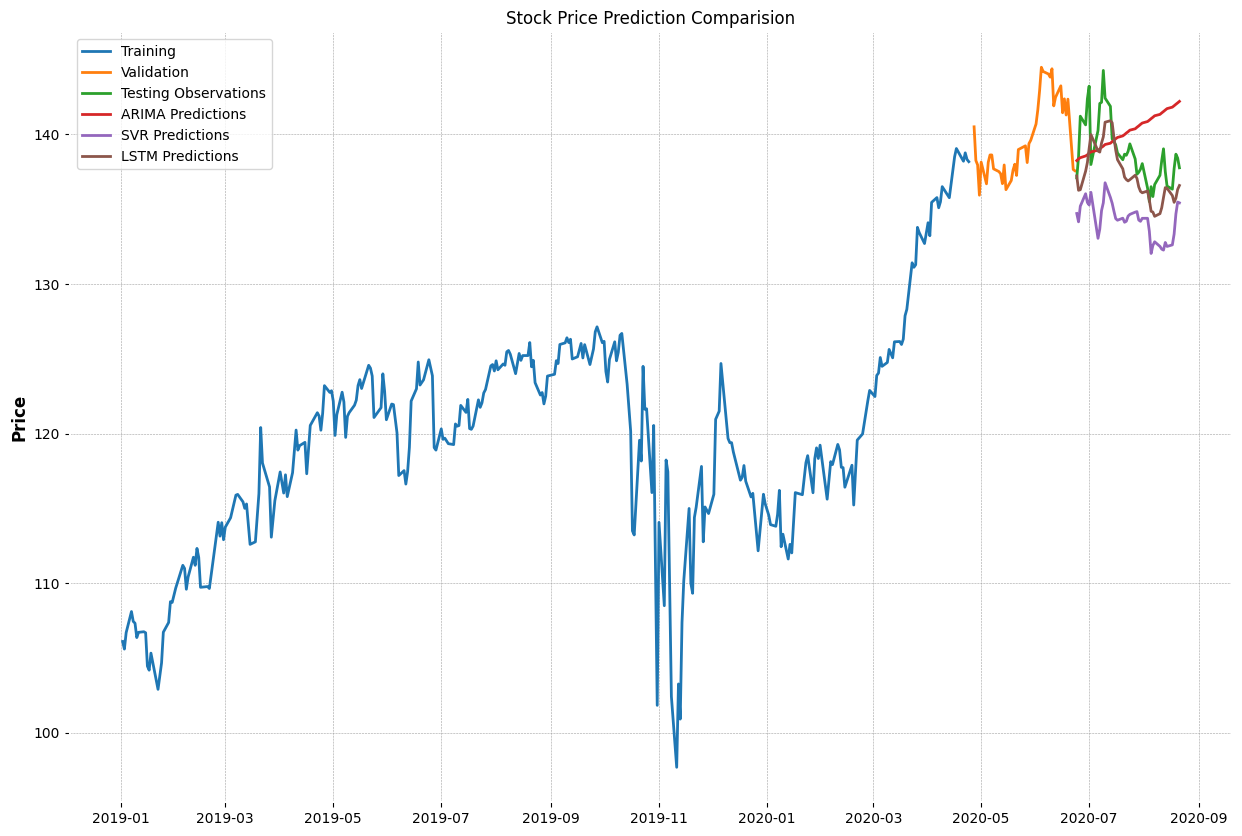

In [52]:
evaluate_performance(y_test_arima_inv, test_arima_inv, "ARIMA")
evaluate_performance(y_test_svr_inv, test_svr_inv, "SVR")
evaluate_performance(y_test_inv, test_predictions_inv, "LSTM")

plt.figure(figsize=(15, 10))
plt.plot(dates_train, y_train_inv, label='Training')
plt.plot(dates_val, y_val_inv, label='Validation')
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.plot(dates_test, test_arima_inv, label='ARIMA Predictions')
plt.plot(dates_test, test_svr_inv, label='SVR Predictions')
plt.plot(dates_test, test_predictions_inv, label='LSTM Predictions')

plt.title('Stock Price Prediction Comparision')
plt.legend()
plt.ylabel('Price')
plt.show()

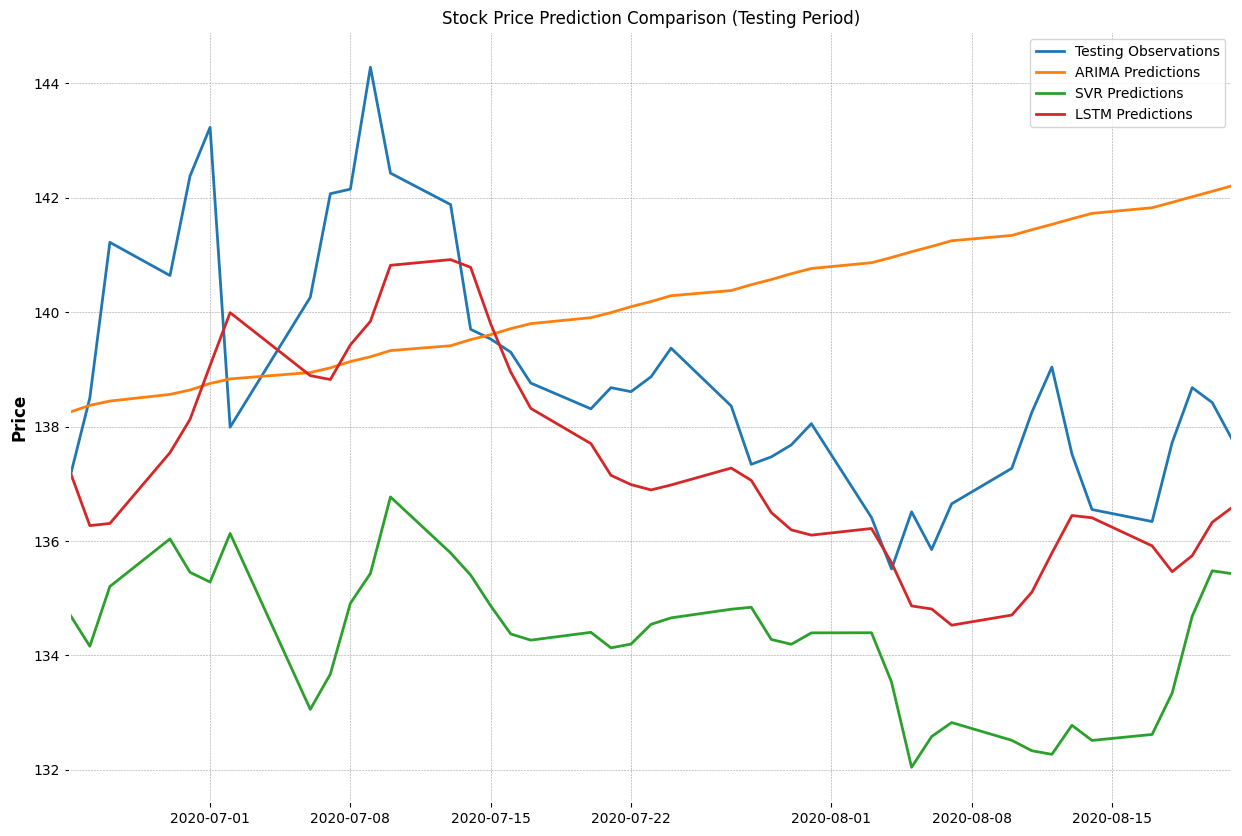

In [53]:
# Plot the predictions focusing on the testing period
plt.figure(figsize=(15, 10))
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.plot(dates_test, test_arima_inv, label='ARIMA Predictions')
plt.plot(dates_test, test_svr_inv, label='SVR Predictions')
plt.plot(dates_test, test_predictions_inv, label='LSTM Predictions')

plt.title('Stock Price Prediction Comparison (Testing Period)')
plt.legend()
plt.ylabel('Price')

# Set x-axis limits to focus on the testing period
plt.xlim(dates_test[0], dates_test[-1])

plt.show()

# Prediction with Return(RET)

In [54]:
df_ret = df[['RET']]
df_ret.head(10)

RET
date                
2019-01-02 -0.006963
2019-01-03 -0.007011
2019-01-04  0.020410
2019-01-07 -0.004000
2019-01-08  0.003691
2019-01-09 -0.016331
2019-01-10  0.002419
2019-01-11  0.006581
2019-01-14 -0.006756
2019-01-15  0.009435

In [55]:
# Normalize the data
scaler_ret = MinMaxScaler(feature_range=(0, 1))
df_scaled_ret = pd.DataFrame(scaler_ret.fit_transform(df_ret), columns=df_ret.columns, index=df_ret.index)

In [56]:
time_step_r = 90 #Adjust as needed for actural data
# dates_r, X_r, y_r = window_dataset(df_scaled_ret, '2022-01-03', '2023-12-29', target_col='RET', time_step=time_step)
dates_r, X_r, y_r = window_dataset(df_scaled_ret, '2019-01-02', '2020-12-31', target_col='RET', time_step=time_step_r)
print("Dates:", dates_r.shape)
print("X shape:", X_r.shape)
print("y shape:", y_r.shape)

Dates: (414,)
X shape: (414, 90, 1)
y shape: (414,)


In [57]:
# Split the dataset into training, validation, and test sets
dates_r_train, X_r_train, y_r_train = dates_r[:q_80], X_r[:q_80], y_r[:q_80]
dates_r_val, X_r_val, y_r_val = dates_r[q_80:q_90], X_r[q_80:q_90], y_r[q_80:q_90]
dates_r_test, X_r_test, y_r_test = dates_r[q_90:], X_r[q_90:], y_r[q_90:]


In [58]:
# Function to inverse transform predictions
def inverse_transform_predictions(predictions, original_data, scaler):
    dummy = np.zeros((predictions.shape[0], original_data.shape[1]))
    dummy[:, 0] = predictions
    inverse_transformed = scaler.inverse_transform(dummy)
    return inverse_transformed[:, 0]

## ARIMA Prediction

In [59]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
# Define a function to fit ARIMA model and return performance metrics
def evaluate_arima_model(order):
    try:
        # Fit ARIMA model
        train_series = pd.Series(y_r_train, index=dates_r_train)
        model = ARIMA(train_series, order=order)
        model_fit = model.fit()

        # Forecasting beyond the training data
        n_forecast_val = len(dates_r_val)

        # Get forecast for validation set
        val_forecast = model_fit.get_forecast(steps=n_forecast_val)
        val_pred = val_forecast.predicted_mean

        # Inverse transform the predictions
        val_pred_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
        y_val_inv = scaler.inverse_transform(y_r_val.reshape(-1, 1)).flatten()

        # Calculate MSE and MAE for validation set
        val_mse = mean_squared_error(y_val_inv, val_pred_inv)
        val_mae = mean_absolute_error(y_val_inv, val_pred_inv)

        return val_mse, val_mae
    except Exception as e:
        print(f"Error for order {order}: {e}")
        return float("inf"), float("inf")

# Grid search for ARIMA parameters
best_order = None
best_mse = float("inf")
best_mae = float("inf")

for p in range(6):
    for d in range(3):
        for q in range(6):
            order = (p, d, q)
            mse, mae = evaluate_arima_model(order)
            if mse < best_mse:
                best_mse = mse
                best_mae = mae
                best_order = order
            print(f'Order {order} - Validation MSE: {mse}, Validation MAE: {mae}')

print(f'Best order: {best_order} - Validation MSE: {best_mse}, Validation MAE: {best_mae}')


Order (0, 0, 0) - Validation MSE: 6.55699081801677, Validation MAE: 1.9539142839339299
Order (0, 0, 1) - Validation MSE: 6.53100343898272, Validation MAE: 1.9506522241061268
Order (0, 0, 2) - Validation MSE: 6.530479299890792, Validation MAE: 1.950570338391718
Order (0, 0, 3) - Validation MSE: 6.590938449623765, Validation MAE: 1.9606215411757977
Order (0, 0, 4) - Validation MSE: 6.479081260169361, Validation MAE: 1.947545863994962
Order (0, 0, 5) - Validation MSE: 6.450408573709772, Validation MAE: 1.9480749712481826
Order (0, 1, 0) - Validation MSE: 6.581319834756377, Validation MAE: 1.9868407075318246
Order (0, 1, 1) - Validation MSE: 6.557129812660135, Validation MAE: 1.9539077396375113
Order (0, 1, 2) - Validation MSE: 6.531788649134047, Validation MAE: 1.950733547096881
Order (0, 1, 3) - Validation MSE: 6.532043718325596, Validation MAE: 1.9507757941966624
Order (0, 1, 4) - Validation MSE: 6.589864892007725, Validation MAE: 1.9604199501323138
Order (0, 1, 5) - Validation MSE: 6.6

In [60]:
# Fit the best ARIMA model on the entire training data
train_series = pd.Series(y_r_train, index=dates_r_train)
best_model = ARIMA(train_series, order=best_order)
best_model_fit = best_model.fit()

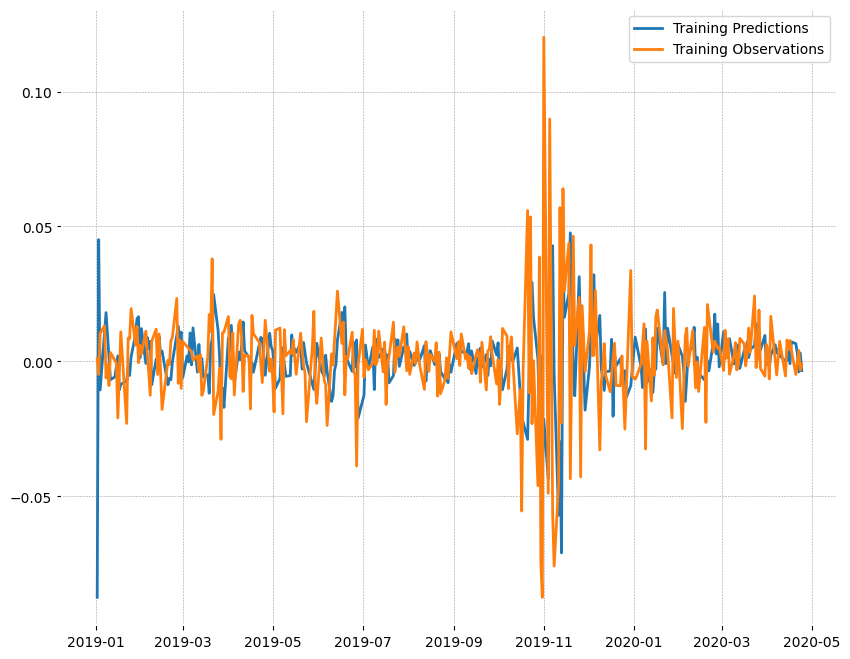

ARIMA Training Performance:
MSE: 0.00047908876508798436
RMSE: 0.02188809642449485
MAE: 0.014050818011458998



In [61]:
# Predicting and inverse transforming for training data
train_predictions_arima_ret = best_model_fit.predict(start=0, end=len(dates_r_train)-1, typ='levels')
train_predictions_inv_arima_ret = inverse_transform_predictions(train_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_train_inv_arima_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_arima_ret)
plt.plot(dates_r_train, y_train_inv_arima_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_arima_ret, train_predictions_inv_arima_ret, "ARIMA Training")

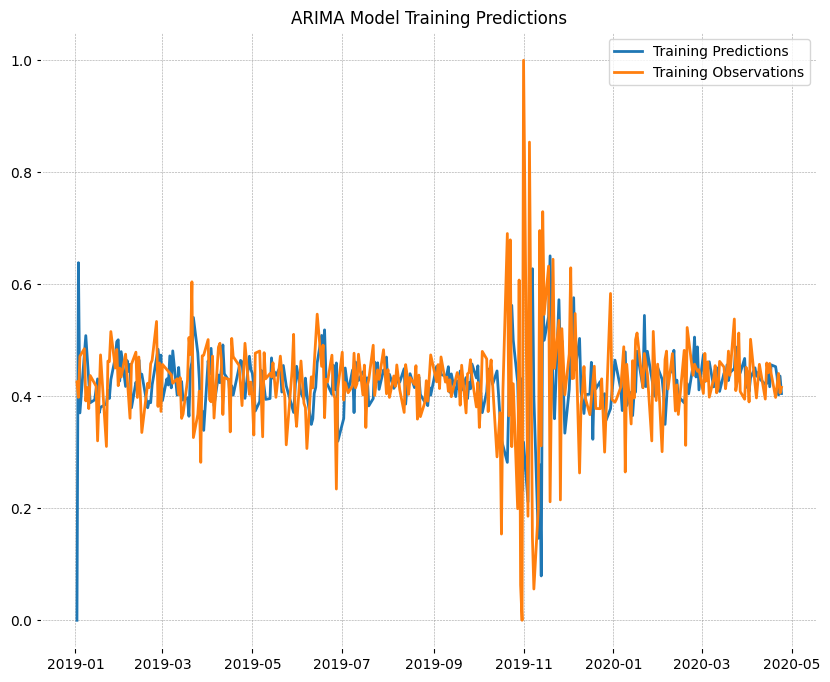

ARIMA Training Performance:
MSE: 0.011131012722891286
RMSE: 0.10550361473850688
MAE: 0.06772686219450695



In [62]:
# Predicting for training data without inverse transforming
train_predictions_arima_ret = best_model_fit.predict(start=0, end=len(dates_r_train)-1, typ='levels')

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_arima_ret.values)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('ARIMA Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_arima_ret.values, "ARIMA Training")


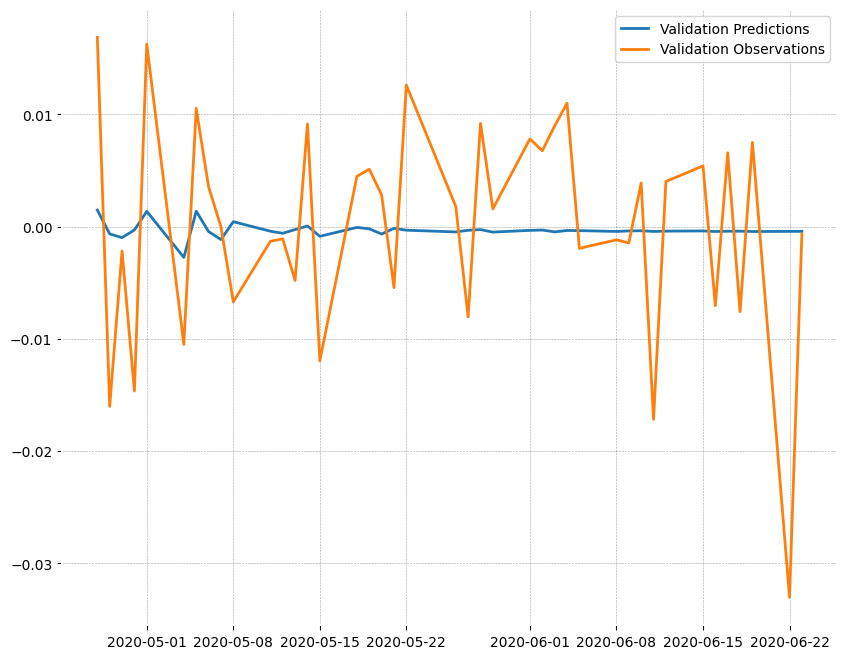

ARIMA Validation Performance:
MSE: 9.059183083223855e-05
RMSE: 0.009517974092853928
MAE: 0.007358133778194056



In [63]:
# Validation predictions and evaluation
val_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_val))
val_predictions_arima_ret = val_forecast_ret.predicted_mean
val_predictions_inv_arima_ret = inverse_transform_predictions(val_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_val_inv_arima_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_arima_ret)
plt.plot(dates_r_val, y_val_inv_arima_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_inv_arima_ret, val_predictions_inv_arima_ret, "ARIMA Validation")


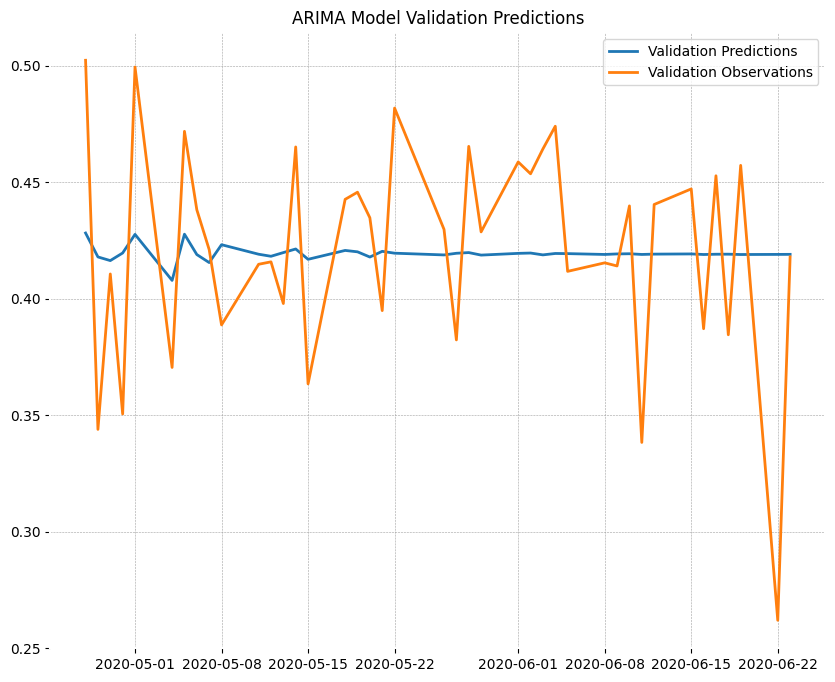

ARIMA Validation Performance:
MSE: 0.00210478494814729
RMSE: 0.045877935308242565
MAE: 0.03546720995162538



In [64]:
# Validation predictions and evaluation without inverse transforming
val_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_val))
val_predictions_arima_ret = val_forecast_ret.predicted_mean

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_arima_ret.values)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('ARIMA Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_arima_ret.values, "ARIMA Validation")

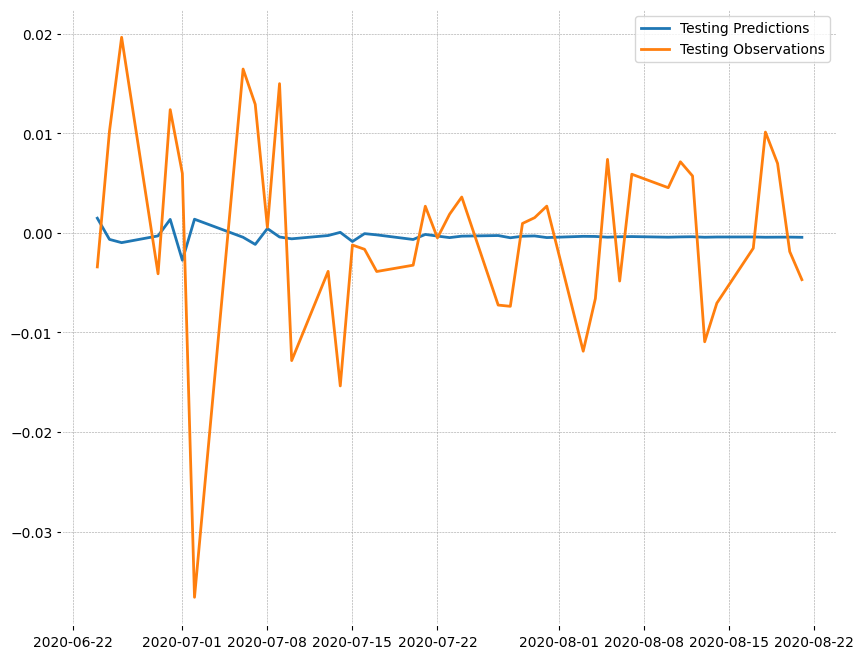

ARIMA Test Performance:
MSE: 0.00010131980928960996
RMSE: 0.010065774152523488
MAE: 0.007381770572316118



In [65]:
# Test predictions and evaluation
test_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_test))
test_predictions_arima_ret = test_forecast_ret.predicted_mean
test_predictions_inv_arima_ret = inverse_transform_predictions(test_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_test_inv_arima_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_arima_ret)
plt.plot(dates_r_test, y_test_inv_arima_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv_arima_ret, test_predictions_inv_arima_ret, "ARIMA Test")

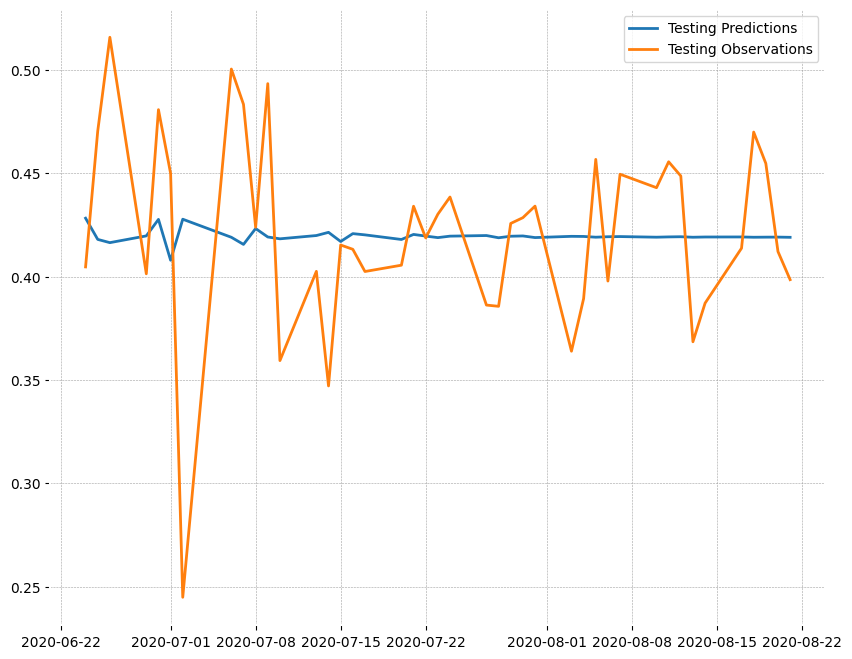

ARIMA Test Performance:
MSE: 0.0023540357621962787
RMSE: 0.04851840642680135
MAE: 0.03558114252814294



In [66]:
# Test predictions and evaluation without inverse transforming
test_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_test))
test_predictions_arima_ret = test_forecast_ret.predicted_mean

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_arima_ret.values)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_r_test, test_predictions_arima_ret.values, "ARIMA Test")

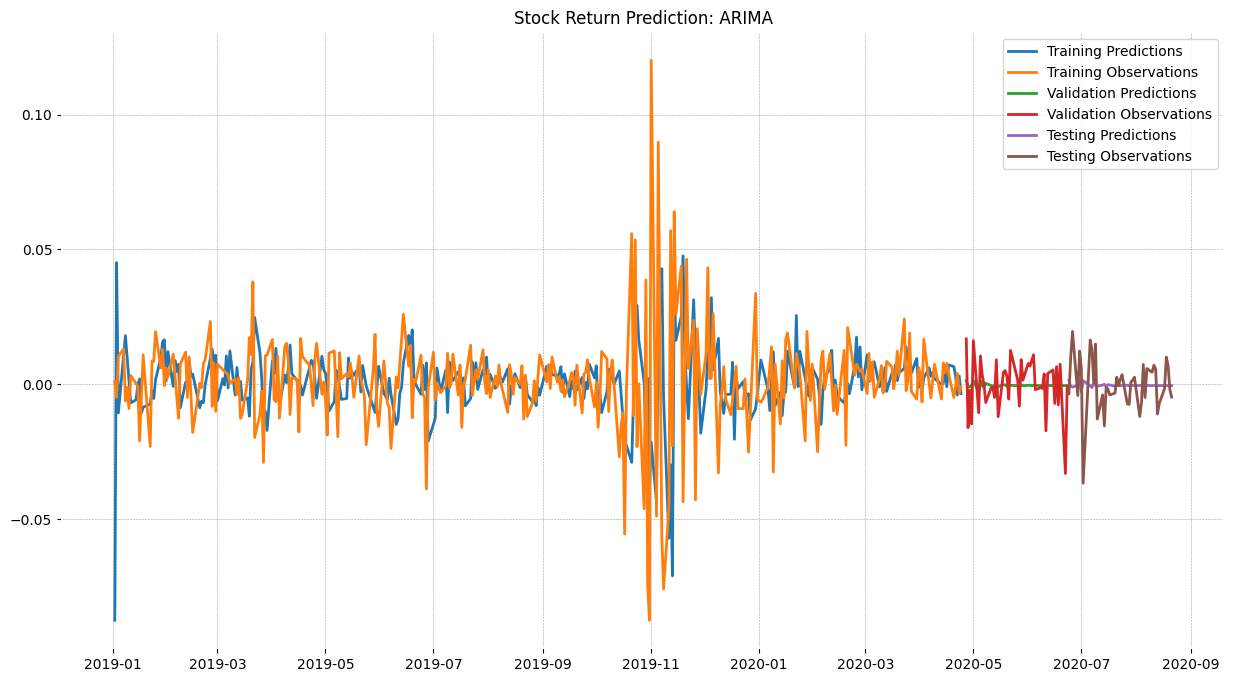

In [67]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_arima_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_arima_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_arima_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_arima_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_arima_ret, label='Testing Observations')
plt.title('Stock Return Prediction: ARIMA')
plt.legend()
plt.show()

## LSTM Prediction

In [68]:
model_r = Sequential([layers.Input((time_step_r, X_r_train.shape[2])),
            layers.LSTM(256),
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(1)
          ])
model_r.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model_r.fit(X_r_train, y_r_train, validation_data=(X_r_val, y_r_val), epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - loss: 0.1225 - mean_absolute_error: 0.3121 - val_loss: 0.0254 - val_mean_absolute_error: 0.1524
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - loss: 0.0248 - mean_absolute_error: 0.1369 - val_loss: 0.0097 - val_mean_absolute_error: 0.0859
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - loss: 0.0110 - mean_absolute_error: 0.0766 - val_loss: 0.0038 - val_mean_absolute_error: 0.0518
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - loss: 0.0111 - mean_absolute_error: 0.0657 - val_loss: 0.0025 - val_mean_absolute_error: 0.0376
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - loss: 0.0080 - mean_absolute_error: 0.0563 - val_loss: 0.0023 - val_mean_absolute_error: 0.0373
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 0.0101 - mean_absolute_error: 0.0566 - val_loss: 0.0023 - val_mean_absolute_error: 0.0381
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 0.0089 - mean_absolute_error: 0.0

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step


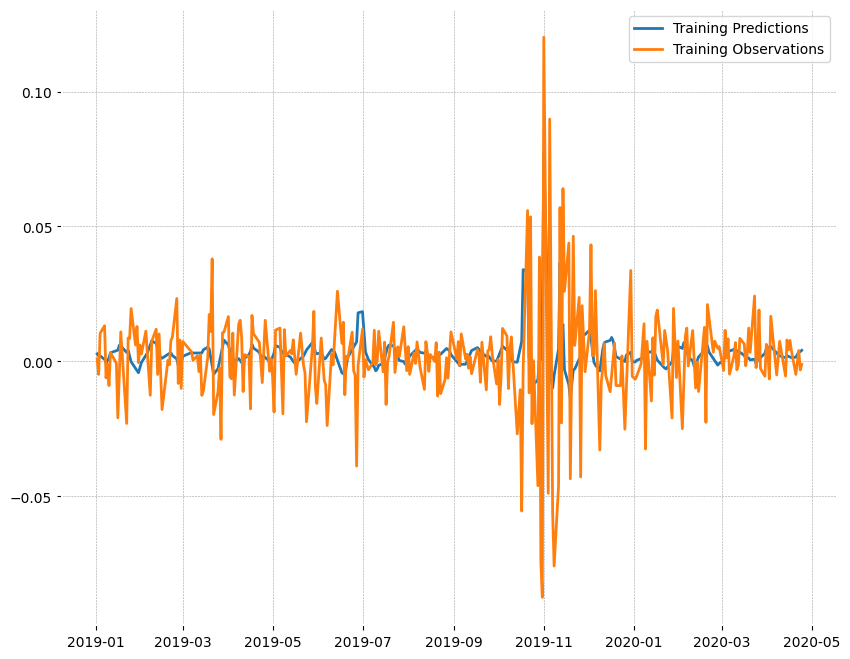

LSTM Training Performance:
MSE: 0.000301855040297285
RMSE: 0.017373975949600166
MAE: 0.011015104512030636



In [69]:
# Predicting and inverse transforming for training data
train_predictions_ret = model_r.predict(X_r_train).flatten()
train_predictions_inv_ret = inverse_transform_predictions(train_predictions_ret, df_scaled_ret, scaler_ret)
y_train_inv_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_ret)
plt.plot(dates_r_train, y_train_inv_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_ret, train_predictions_inv_ret, "LSTM Training")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


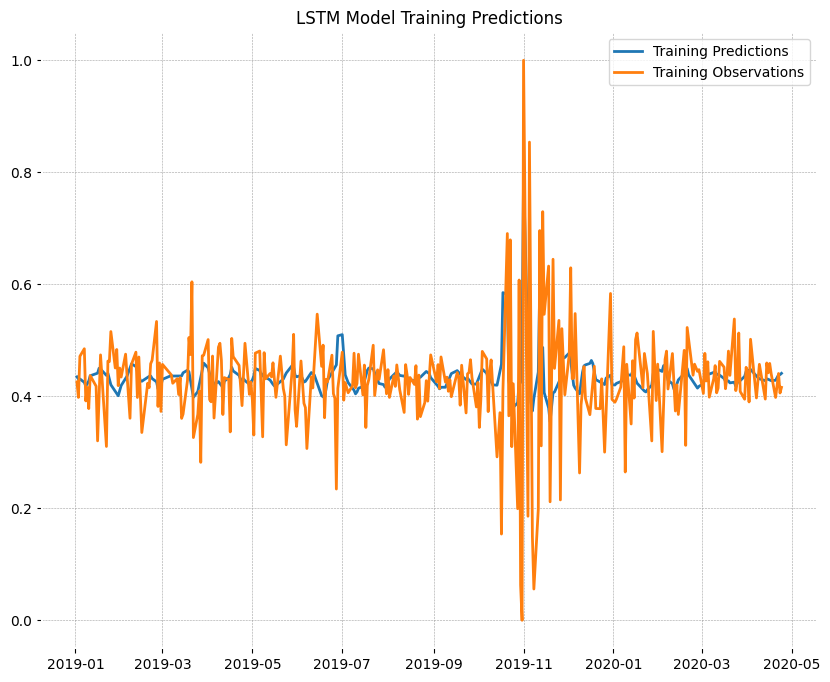

LSTM Training Performance:
MSE: 0.007013214286416769
RMSE: 0.08374493569135666
MAE: 0.05309431254863739



In [70]:
# Predicting for training data without inverse transforming
train_predictions_ret = model_r.predict(X_r_train).flatten()

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_ret)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('LSTM Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_ret, "LSTM Training")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


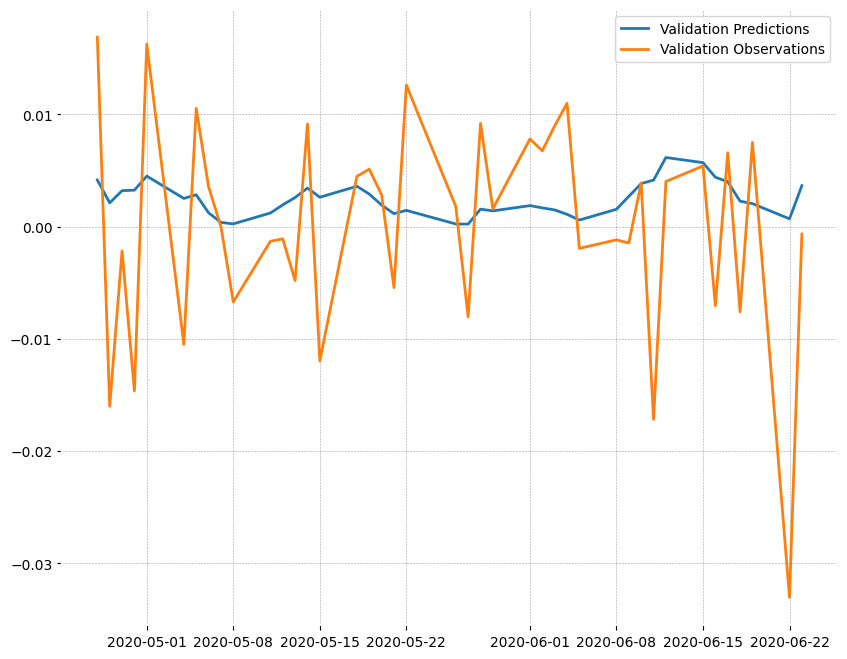

LSTM Validation Performance:
MSE: 9.761728773872043e-05
RMSE: 0.009880146139542696
MAE: 0.007262696141567172



In [71]:
# Predicting and inverse transforming for validation data
val_predictions_ret = model_r.predict(X_r_val).flatten()
val_predictions_inv_ret = inverse_transform_predictions(val_predictions_ret, df_scaled_ret, scaler_ret)
y_val_inv_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_ret)
plt.plot(dates_r_val, y_val_inv_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_val_inv_ret, val_predictions_inv_ret, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


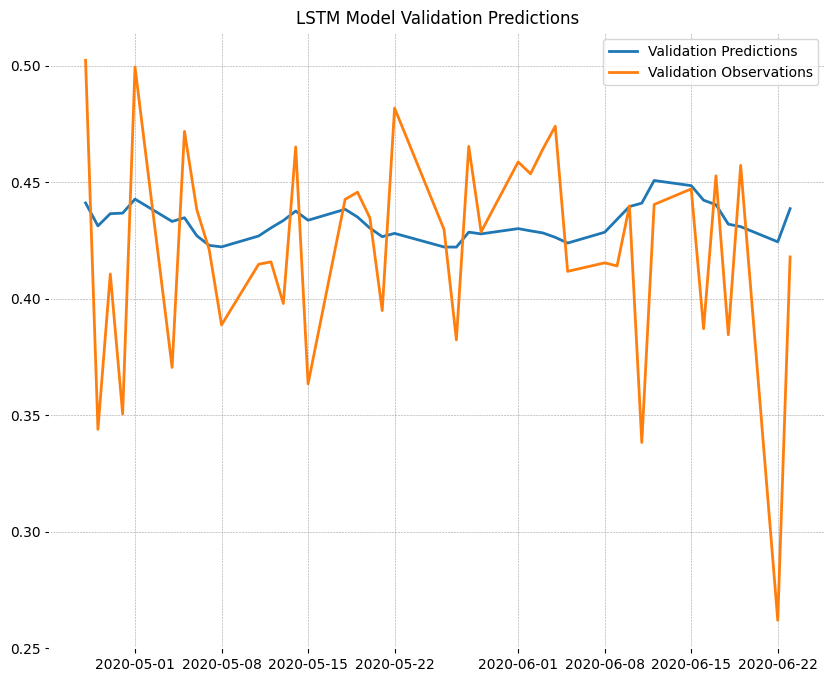

LSTM Validation Performance:
MSE: 0.00226801261305809
RMSE: 0.0476236566901207
MAE: 0.035007186233997345



In [72]:
# Predicting for validation data without inverse transforming
val_predictions_ret = model_r.predict(X_r_val).flatten()

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_ret)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('LSTM Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_ret, "LSTM Validation")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


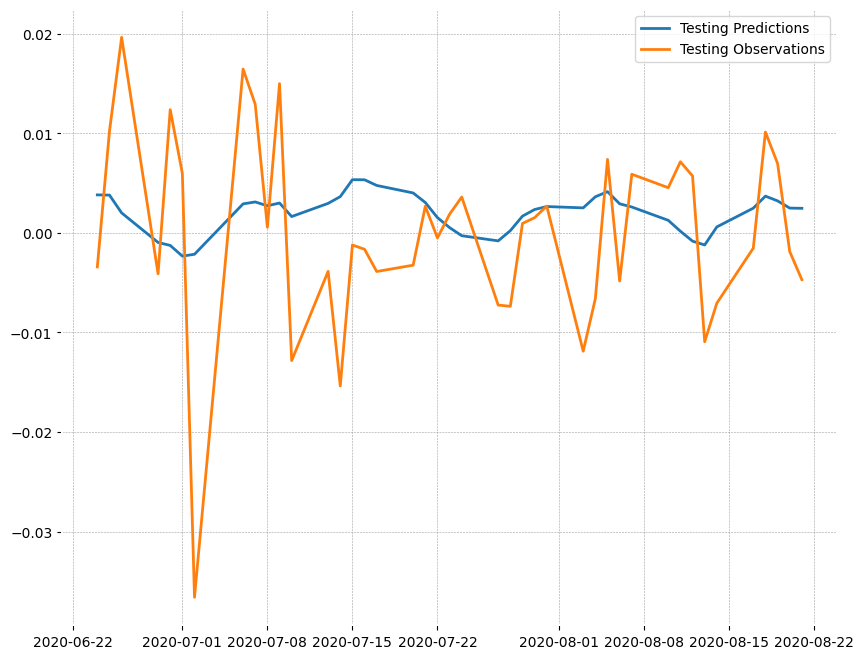

LSTM Testing Performance:
MSE: 9.596305653232975e-05
RMSE: 0.009796073526282341
MAE: 0.007621028616959495



In [73]:
# Predicting and inverse transforming for testing data
test_predictions_ret = model_r.predict(X_r_test).flatten()
test_predictions_inv_ret = inverse_transform_predictions(test_predictions_ret, df_scaled_ret, scaler_ret)
y_test_inv_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_ret)
plt.plot(dates_r_test, y_test_inv_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_test_inv_ret, test_predictions_inv_ret, "LSTM Testing")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


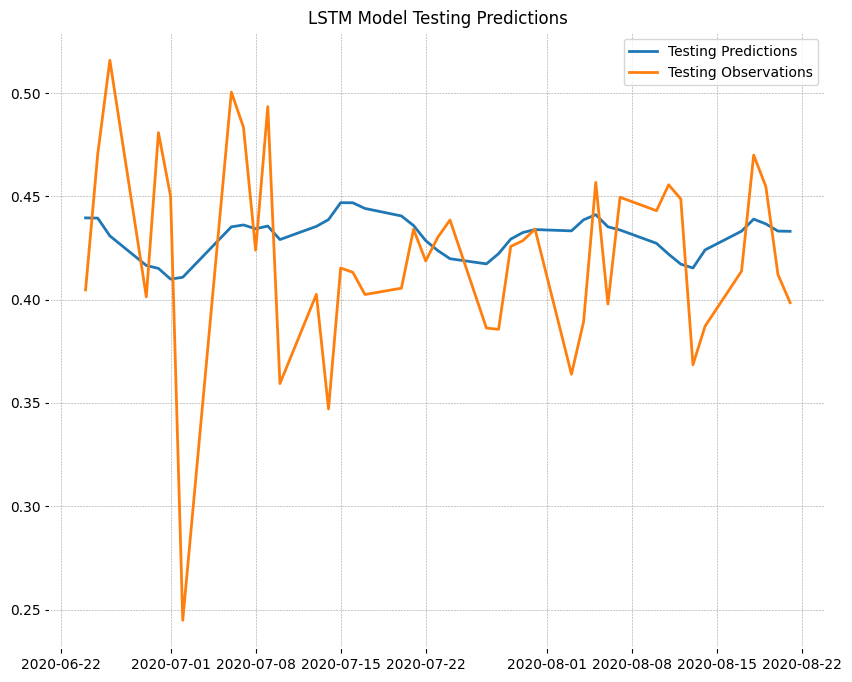

LSTM Testing Performance:
MSE: 0.0022295783273875713
RMSE: 0.04721841216087341
MAE: 0.03673439845442772



In [74]:
# Predicting for testing data without inverse transforming
test_predictions_ret = model_r.predict(X_r_test).flatten()

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_ret)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('LSTM Model Testing Predictions')
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_r_test, test_predictions_ret, "LSTM Testing")


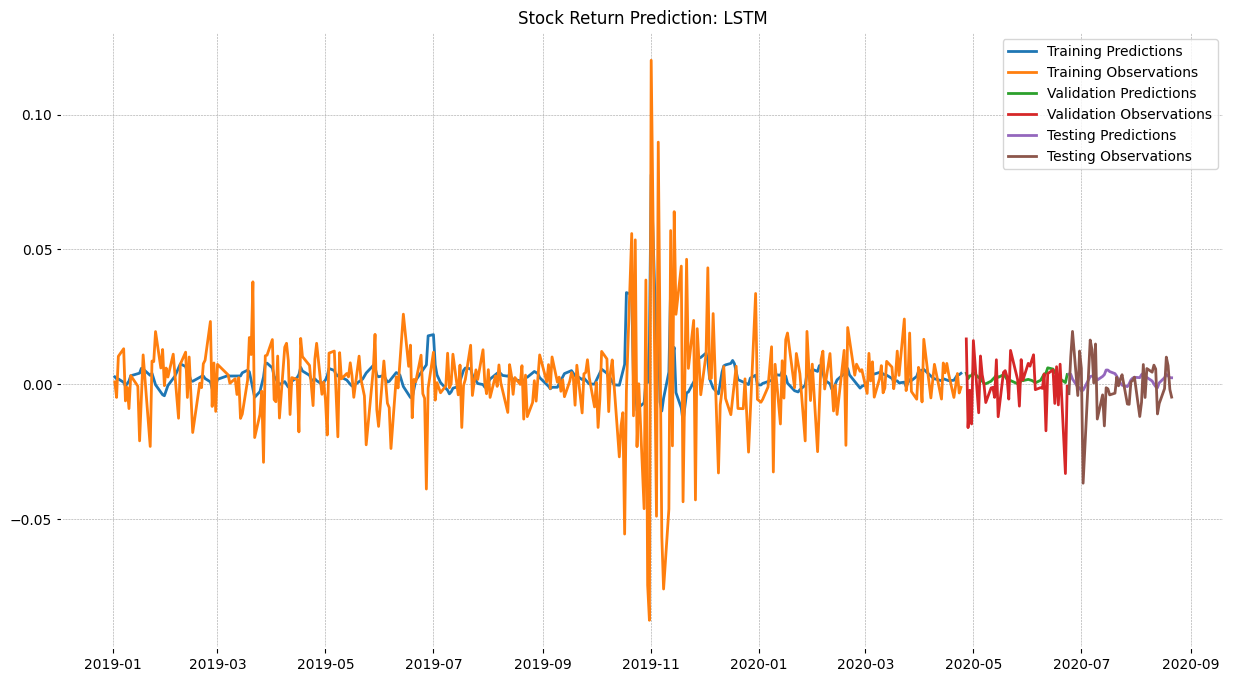

In [75]:
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.title('Stock Return Prediction: LSTM')
plt.legend()
plt.show()


## SVR Prediction

In [76]:
# Combine train and validation sets for hyperparameter tuning
X_r_train_val = np.concatenate((X_r_train, X_r_val))
y_r_train_val = np.concatenate((y_r_train, y_r_val))

# Reshape for GridSearchCV
X_r_train_val_flat = X_r_train_val.reshape(X_r_train_val.shape[0], -1)
X_r_test_flat = X_r_test.reshape(X_r_test.shape[0], -1)

In [77]:
from sklearn.svm import SVR
# Define the SVR model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_r_train_val_flat, y_r_train_val)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the SVR model using the best parameters
best_svr = grid_search.best_estimator_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}


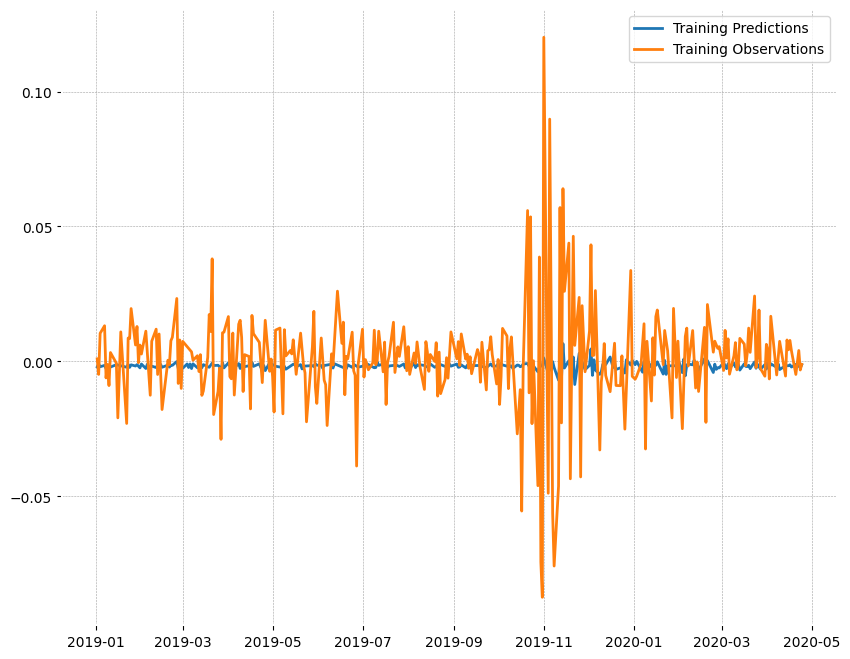

SVR Training Performance:
MSE: 0.00033643571093892747
RMSE: 0.018342183919558965
MAE: 0.011513478650742544



In [78]:
# Predicting and inverse transforming for training data
train_predictions_svr_ret = best_svr.predict(X_r_train.reshape(X_r_train.shape[0], -1))
train_predictions_inv_svr_ret = inverse_transform_predictions(train_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_train_inv_svr_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_svr_ret)
plt.plot(dates_r_train, y_train_inv_svr_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_svr_ret, train_predictions_inv_svr_ret, "SVR Training")

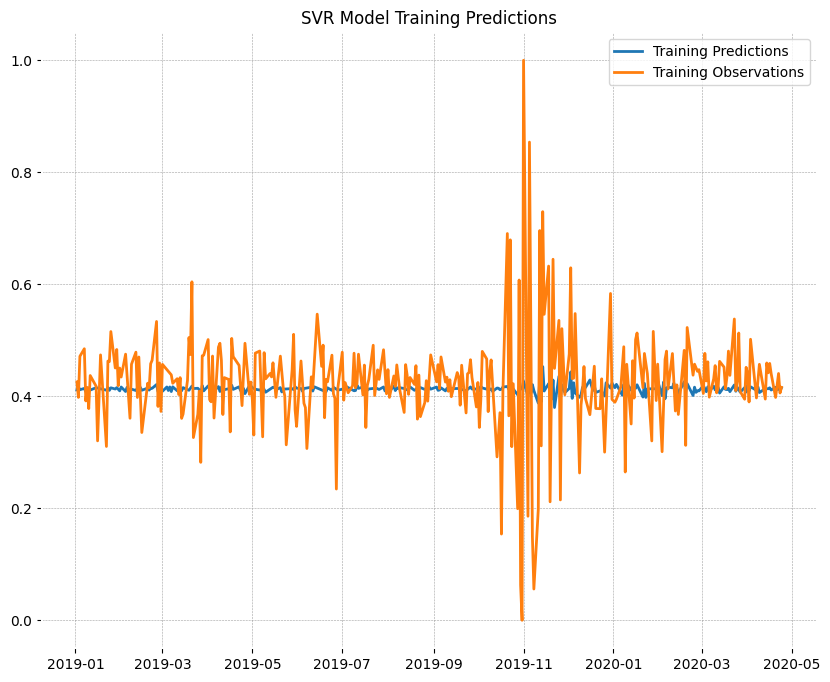

SVR Training Performance:
MSE: 0.00781665205237788
RMSE: 0.08841183208359546
MAE: 0.05549653986851893



In [79]:
# Predicting for training data without inverse transforming
train_predictions_svr_ret = best_svr.predict(X_r_train.reshape(X_r_train.shape[0], -1))

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_svr_ret)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_svr_ret, "SVR Training")


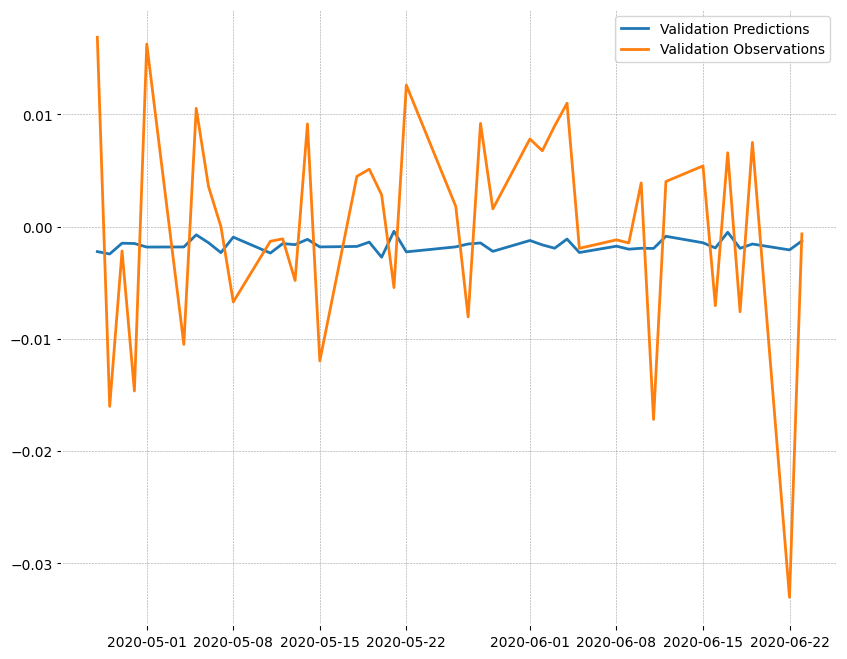

SVR Validation Performance:
MSE: 9.702242932795548e-05
RMSE: 0.00984999641258592
MAE: 0.007770141096017916



In [80]:
# Validation predictions and evaluation
val_predictions_svr_ret = best_svr.predict(X_r_val.flatten().reshape(X_r_val.shape[0], -1))
val_predictions_inv_svr_ret = inverse_transform_predictions(val_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_val_inv_svr_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_svr_ret)
plt.plot(dates_r_val, y_val_inv_svr_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_inv_svr_ret, val_predictions_inv_svr_ret, "SVR Validation")

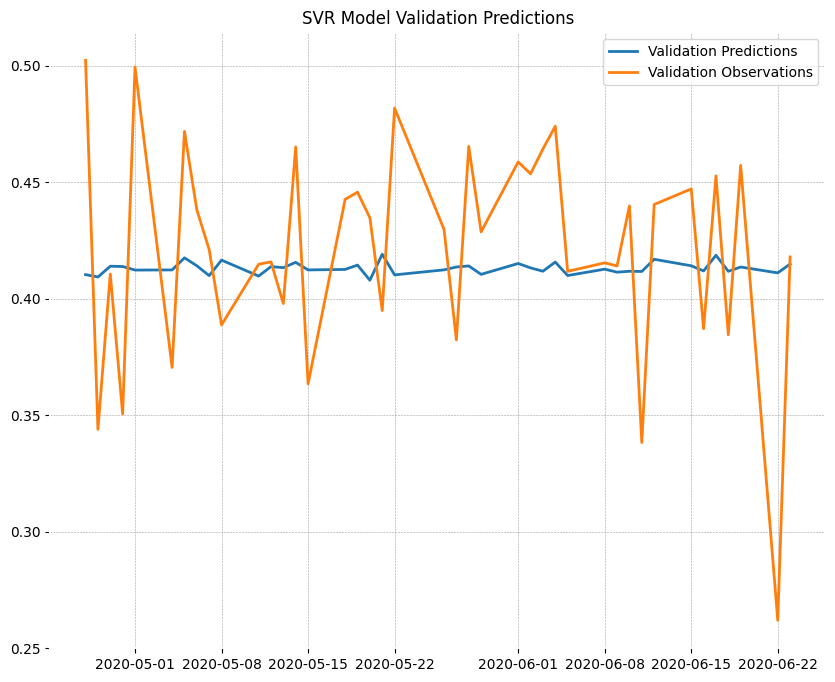

SVR Validation Performance:
MSE: 0.002254191652891212
RMSE: 0.04747832824448658
MAE: 0.037453141504836605



In [81]:
# Validation predictions and evaluation without inverse transforming
val_predictions_svr_ret = best_svr.predict(X_r_val.flatten().reshape(X_r_val.shape[0], -1))

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_svr_ret)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_svr_ret, "SVR Validation")

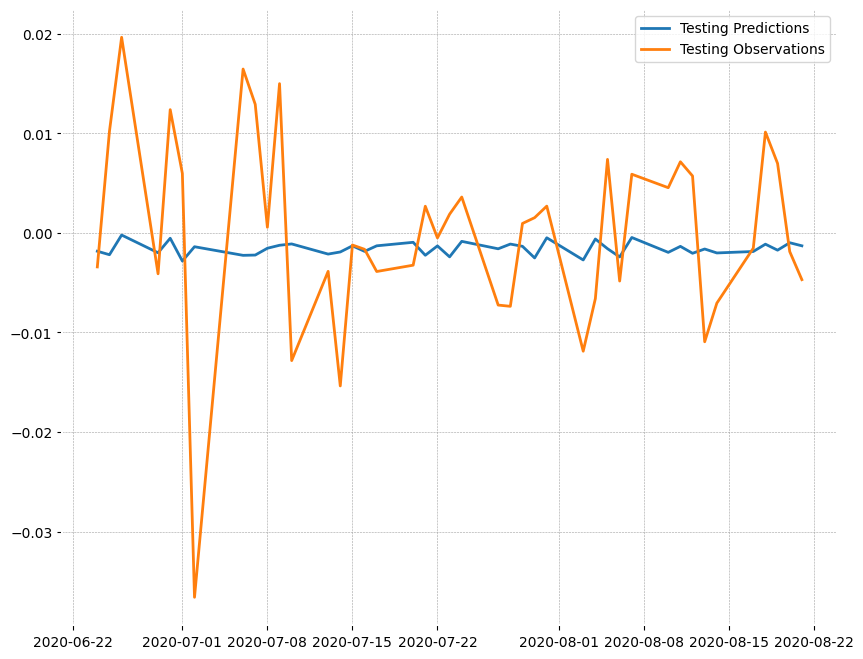

SVR Test Performance:
MSE: 9.83545700469685e-05
RMSE: 0.009917387259100479
MAE: 0.007321537679866677



In [82]:
# Test predictions and evaluation
test_predictions_svr_ret = best_svr.predict((X_r_test.flatten().reshape(X_r_test.shape[0], -1)))
test_predictions_inv_svr_ret = inverse_transform_predictions(test_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_test_inv_svr_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_svr_ret)
plt.plot(dates_r_test, y_test_inv_svr_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv_svr_ret, test_predictions_inv_svr_ret, "SVR Test")

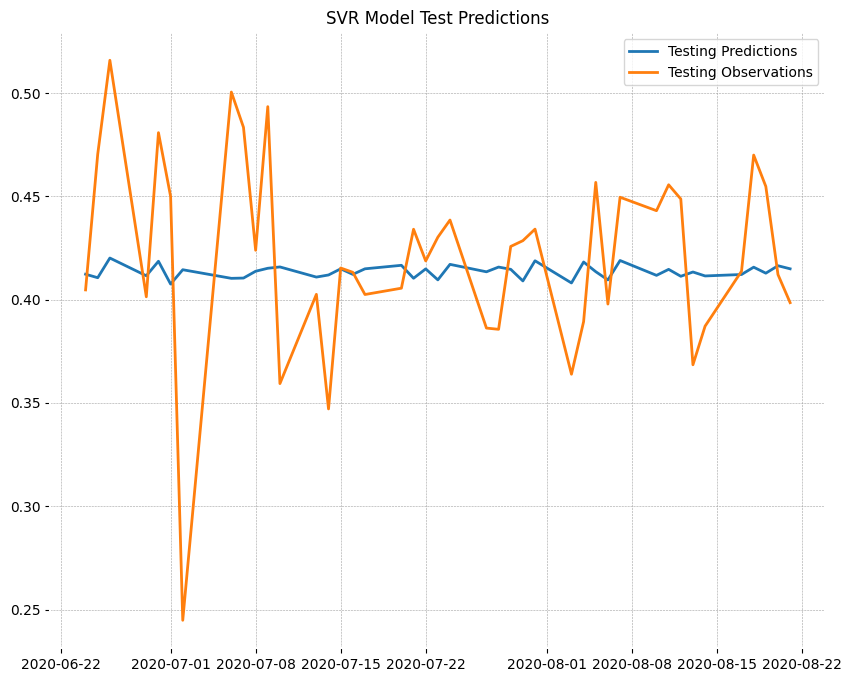

SVR Test Performance:
MSE: 0.002285142233185643
RMSE: 0.04780316133045641
MAE: 0.03529081175856262



In [83]:
# Test predictions and evaluation without inverse transforming
test_predictions_svr_ret = best_svr.predict(X_r_test.flatten().reshape(X_r_test.shape[0], -1))

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_svr_ret)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_r_test, test_predictions_svr_ret, "SVR Test")

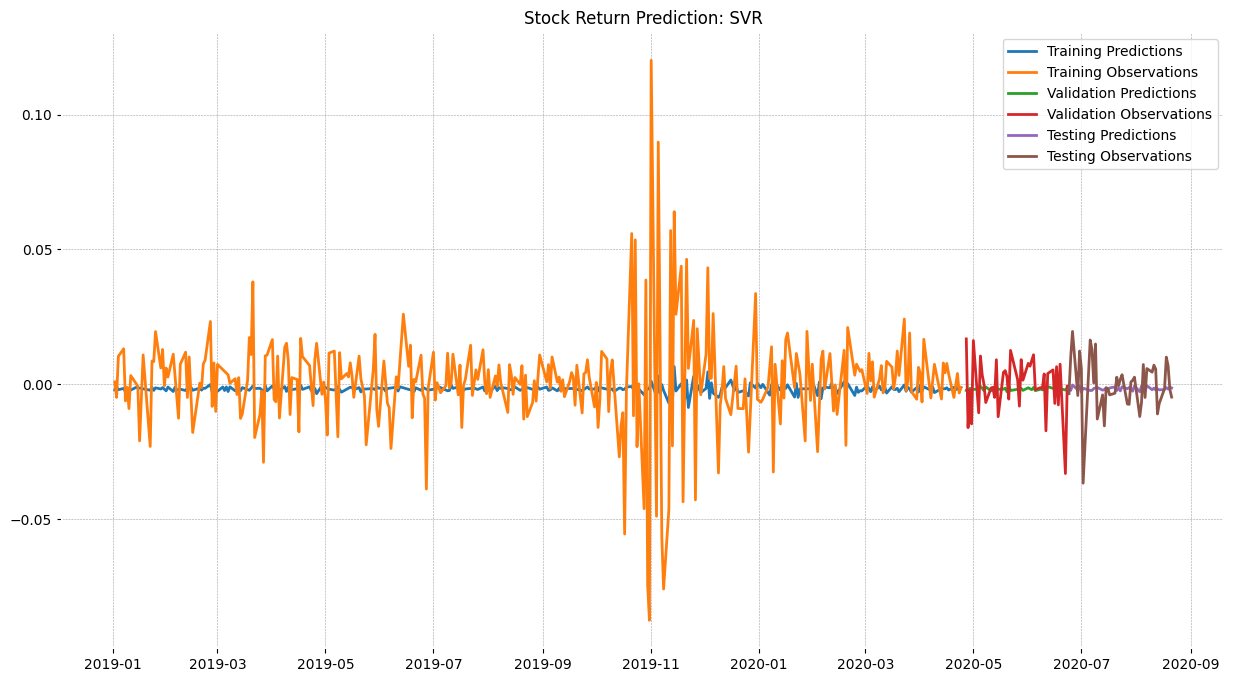

In [84]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_svr_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_svr_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_svr_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_svr_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_svr_ret, label='Testing Observations')
plt.title('Stock Return Prediction: SVR')
plt.legend()
plt.show()

## Summary Comparision

ARIMA Performance:
MSE: 0.00010131980928960996
RMSE: 0.010065774152523488
MAE: 0.007381770572316118

SVR Performance:
MSE: 9.83545700469685e-05
RMSE: 0.009917387259100479
MAE: 0.007321537679866677

LSTM Performance:
MSE: 9.596305653232975e-05
RMSE: 0.009796073526282341
MAE: 0.007621028616959495



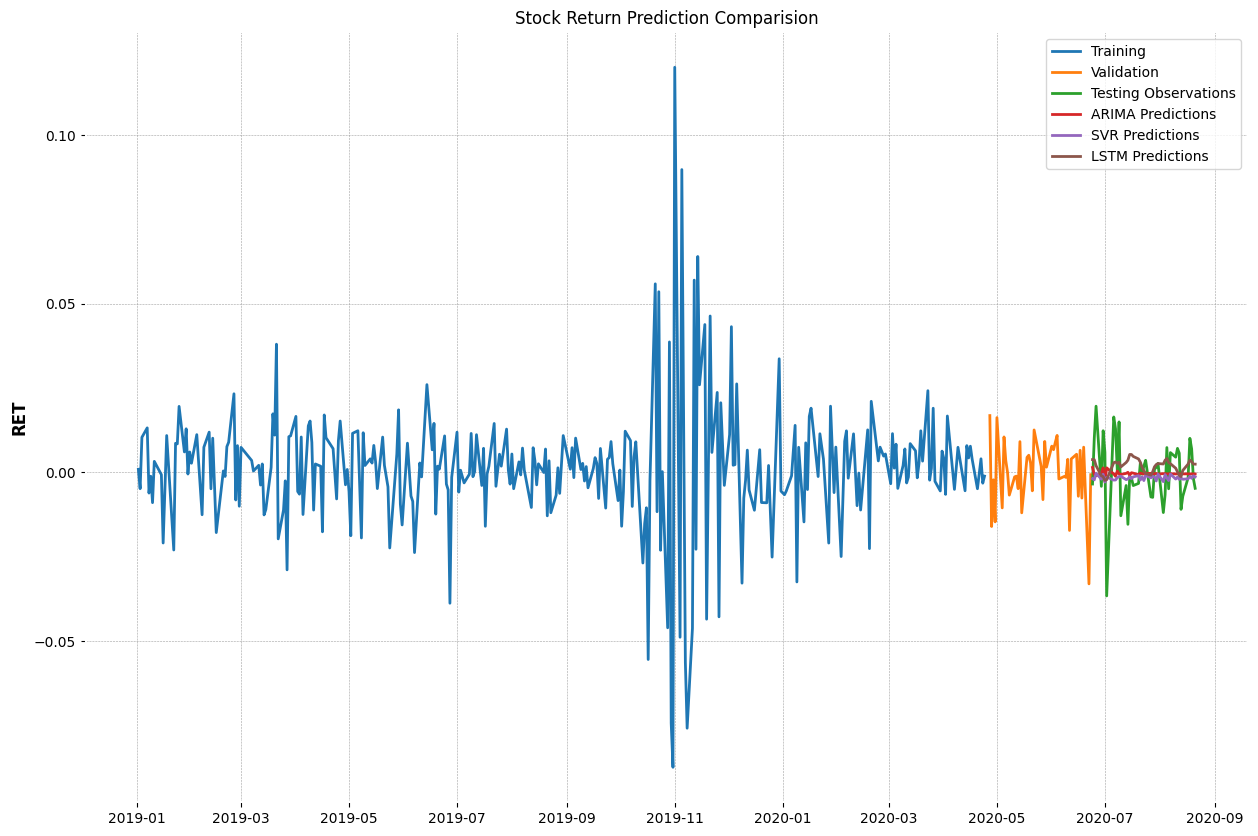

In [85]:
evaluate_performance(y_test_inv_arima_ret, test_predictions_inv_arima_ret, "ARIMA")
evaluate_performance(y_test_inv_svr_ret, test_predictions_inv_svr_ret, "SVR")
evaluate_performance(y_test_inv_ret, test_predictions_inv_ret, "LSTM")


plt.figure(figsize=(15, 10))
plt.plot(dates_r_train, y_train_inv_ret, label='Training')
plt.plot(dates_r_val, y_val_inv_ret, label='Validation')
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='ARIMA Predictions')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='SVR Predictions')
plt.plot(dates_r_test, test_predictions_inv_ret, label='LSTM Predictions')


plt.title('Stock Return Prediction Comparision')
plt.legend()
plt.ylabel('RET')
plt.show()

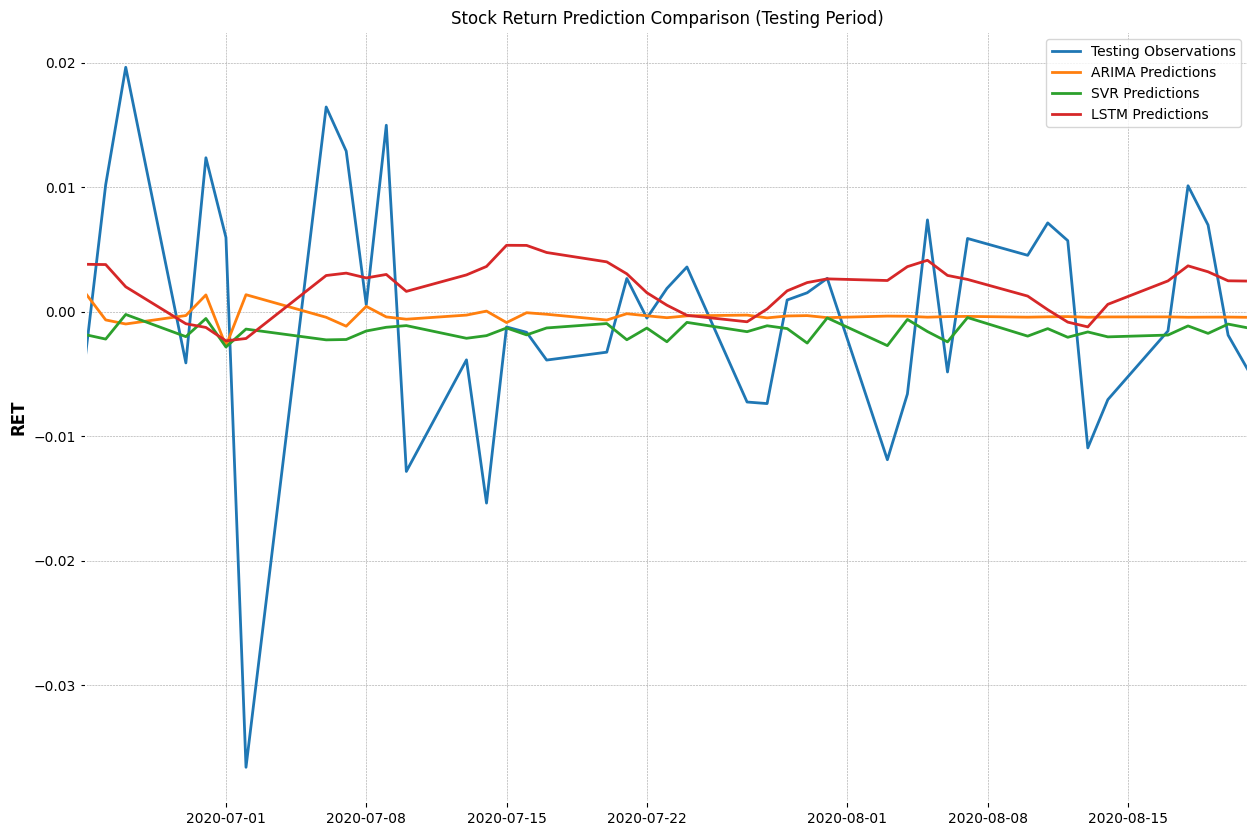

In [86]:
# Plot the predictions focusing on the testing period
plt.figure(figsize=(15, 10))
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='ARIMA Predictions')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='SVR Predictions')
plt.plot(dates_r_test, test_predictions_inv_ret, label='LSTM Predictions')

plt.title('Stock Return Prediction Comparison (Testing Period)')
plt.legend()
plt.ylabel('RET')

# Set x-axis limits to focus on the testing period
plt.xlim(dates_test[0], dates_test[-1])

plt.show()